<a href="https://colab.research.google.com/github/Ciss48/Game_Analysis/blob/main/Task1_ds03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Phân tích data set, so sánh các chỉ số như retention, playtime, level churn, arpu, theo từng version của phiên bản android. Trong các appversion trong game, version nào là tốt nhất

## Import

In [ ]:
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
project_id = 'coffee-please-b767a'

In [ ]:
from google.colab import auth
auth.authenticate_user()
# Construct a BigQuery client object.
from google.cloud import bigquery
client = bigquery.Client(project=project_id)

## Tìm hiểu dữ liệu - EDA

### Tìm min_max_date

In [ ]:
query = """
select min(date_par) as min_date, max(date_par) as max_date from `royal-hexa-in-house.pixon_data_science.002_mock`
"""
min_max_date = client.query(query).to_dataframe()
min_max_date

,min_date,max_date
0,2024-06-01,2024-06-30


### Có bao nhiêu platform trong dataset


In [ ]:
query = """
select distinct platform from `royal-hexa-in-house.pixon_data_science.002_mock`
"""
platform = client.query(query).to_dataframe()
platform
# => Chỉ có 1 platform là android

,platform
0,ANDROID


### Có bao nhiêu appversion


In [ ]:
query = """
select distinct version from `royal-hexa-in-house.pixon_data_science.002_mock`
"""
appversion = client.query(query).to_dataframe()
appversion

,version
0,0.3
1,1.0
2,1.35
3,0.31
4,0.27
5,1.28.2
6,1.35.1
7,1.12
8,1.27
9,0.20


### Xem xem ngày bao nhiêu thì appversion được bắn lên


In [ ]:
query = """
select version, min(date_par) as date_app_version
from `royal-hexa-in-house.pixon_data_science.002_mock`
group by version order by date_app_version
"""
date_app_version = client.query(query).to_dataframe()
date_app_version

,version,date_app_version
0,0.8,2024-06-01
1,1.18,2024-06-01
2,0.29,2024-06-01
3,1.28.2,2024-06-01
4,1.0,2024-06-01
5,1.27,2024-06-01
6,None,2024-06-01
7,0.40,2024-06-01
8,1.12,2024-06-01
9,0.31,2024-06-01


Đa phần các app đều được bắn lên từ trước, app 1.33 và 1.35 được bắn lên vào ngày 2; 1.35.1 bắn lên vào ngày 9; 1.35.2 bắn lên vào ngày 11

### Kiểm tra appversion None, có bao nhiêu người dùng appversion này


In [ ]:
query = """
select count(distinct user_pseudo_id) as num_user
from `royal-hexa-in-house.pixon_data_science.002_mock`
where version is null
"""
appversion_none = client.query(query).to_dataframe()
appversion_none

,num_user
0,1


### Lọc các app có ít user


In [ ]:
query = """
select version, count(distinct user_pseudo_id) as num_user
from `royal-hexa-in-house.pixon_data_science.002_mock`
group by version order by num_user
"""
user_per_appversion = client.query(query).to_dataframe()
user_per_appversion

,version,num_user
0,None,1
1,1.33,2
2,1.0,15
3,1.35.1,16
4,1.35,23
5,0.3,50
6,0.4,121
7,1.1,884
8,0.20,980
9,0.31,1406


Lọc lần 1: loại bỏ các app có user < 6.000

### Đếm user_active theo date


In [ ]:
query = """
select version, date_par, count(distinct user_pseudo_id) as num_user
from `royal-hexa-in-house.pixon_data_science.002_mock`
where version is not null and version not in ('1.33', '1.0','1.35.1','1.35','0.3','0.4','1.1','0.20','0.31','1.28.1','0.8','0.27','0.40','1.12')
and event_name =
group by version, date_par order by date_par
"""
user_per_appversion_date = client.query(query).to_dataframe()
user_per_appversion_date

,version,date_par,num_user
0,0.34,2024-06-01,1564
1,1.20,2024-06-01,3732
2,0.29,2024-06-01,790
3,1.27,2024-06-01,856
4,1.30,2024-06-01,147120
...,...,...,...
315,0.43,2024-06-30,355
316,1.18,2024-06-30,1255
317,1.29.5,2024-06-30,123785
318,1.35.2,2024-06-30,55464


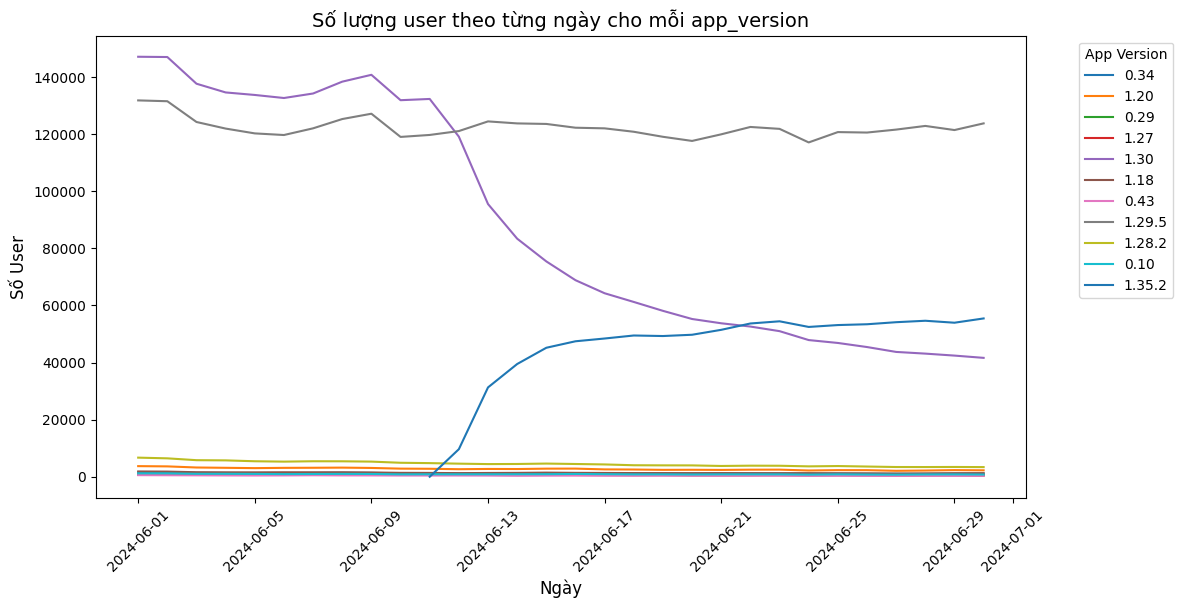

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử user_per_appversion_date đã được load vào dataframe
# df = pd.read_csv("your_file.csv")  # Nếu bạn cần load từ file CSV

# Chuyển cột date_par về dạng datetime để dễ vẽ
# user_per_appversion_date['date_par'] = user_per_appversion_date.to_datetime(user_per_appversion_date['date_par'])

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.lineplot(data=user_per_appversion_date, x="date_par", y="num_user", hue="version", palette="tab10")

# Tùy chỉnh biểu đồ
plt.xlabel("Ngày", fontsize=12)
plt.ylabel("Số User", fontsize=12)
plt.title("Số lượng user theo từng ngày cho mỗi app_version", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="App Version", bbox_to_anchor=(1.05, 1), loc='upper left')

# Hiển thị biểu đồ
plt.show()


3 app đang hoạt động chính là:
- 1.29.5: hoạt động ổn định nhất từ đầu tháng đến cuối tháng
- 1.30: hoạt động nhiều nhất trong khoảng thời gian đầu, giảm dần từ ngày 10
- 1.35.2: Bắt đầu được bắn lên từ ngày 11, tăng dần từ ngày 11

## Phân tích, đánh giá app version

In [ ]:
# Xem các event_name (tiện truy vấn sau này)
query = """
SELECT DISTINCT event_name
FROM `royal-hexa-in-house.pixon_data_science.002_mock`
WHERE NOT REGEXP_CONTAINS(event_name, r'_(\d+)$')
"""
event_name = client.query(query).to_dataframe()
event_name

,event_name
0,in_app_purchase
1,win_level
2,purchase_coinpack6
3,purchase_cozypack
4,level_tryagain_daily
...,...
86,start_challenge
87,purchase_coinpack4
88,nut1_purchaser_last7days
89,purchase_coinpack3


### Active user by appversion

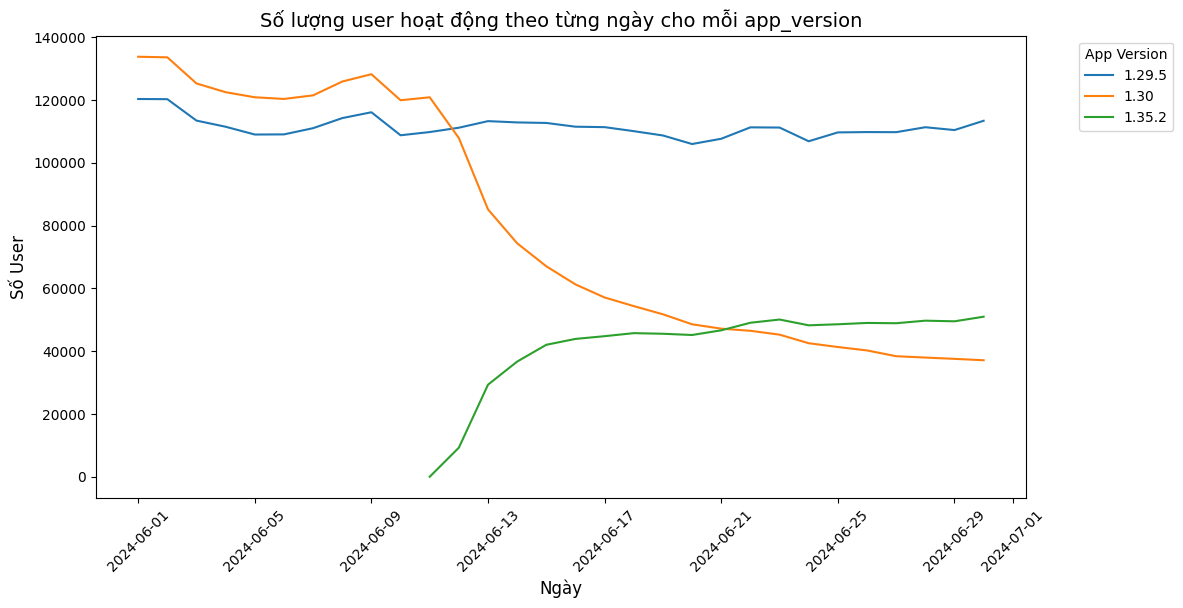

In [ ]:
query = """
SELECT version, date_par, COUNT(DISTINCT user_pseudo_id) AS num_active_user
FROM `royal-hexa-in-house.pixon_data_science.002_mock`
WHERE version IN ('1.29.5', '1.30', '1.35.2')
AND event_name = 'user_engagement'
GROUP BY version, date_par
ORDER BY date_par
"""
active_user = client.query(query).to_dataframe()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.lineplot(data=active_user, x="date_par", y="num_active_user", hue="version", palette="tab10")

# Tùy chỉnh biểu đồ
plt.xlabel("Ngày", fontsize=12)
plt.ylabel("Số User", fontsize=12)
plt.title("Số lượng user hoạt động theo từng ngày cho mỗi app_version", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="App Version", bbox_to_anchor=(1.05, 1), loc='upper left')

# Hiển thị biểu đồ
plt.show()

### So sánh các chỉ số Retention giữa 3 app

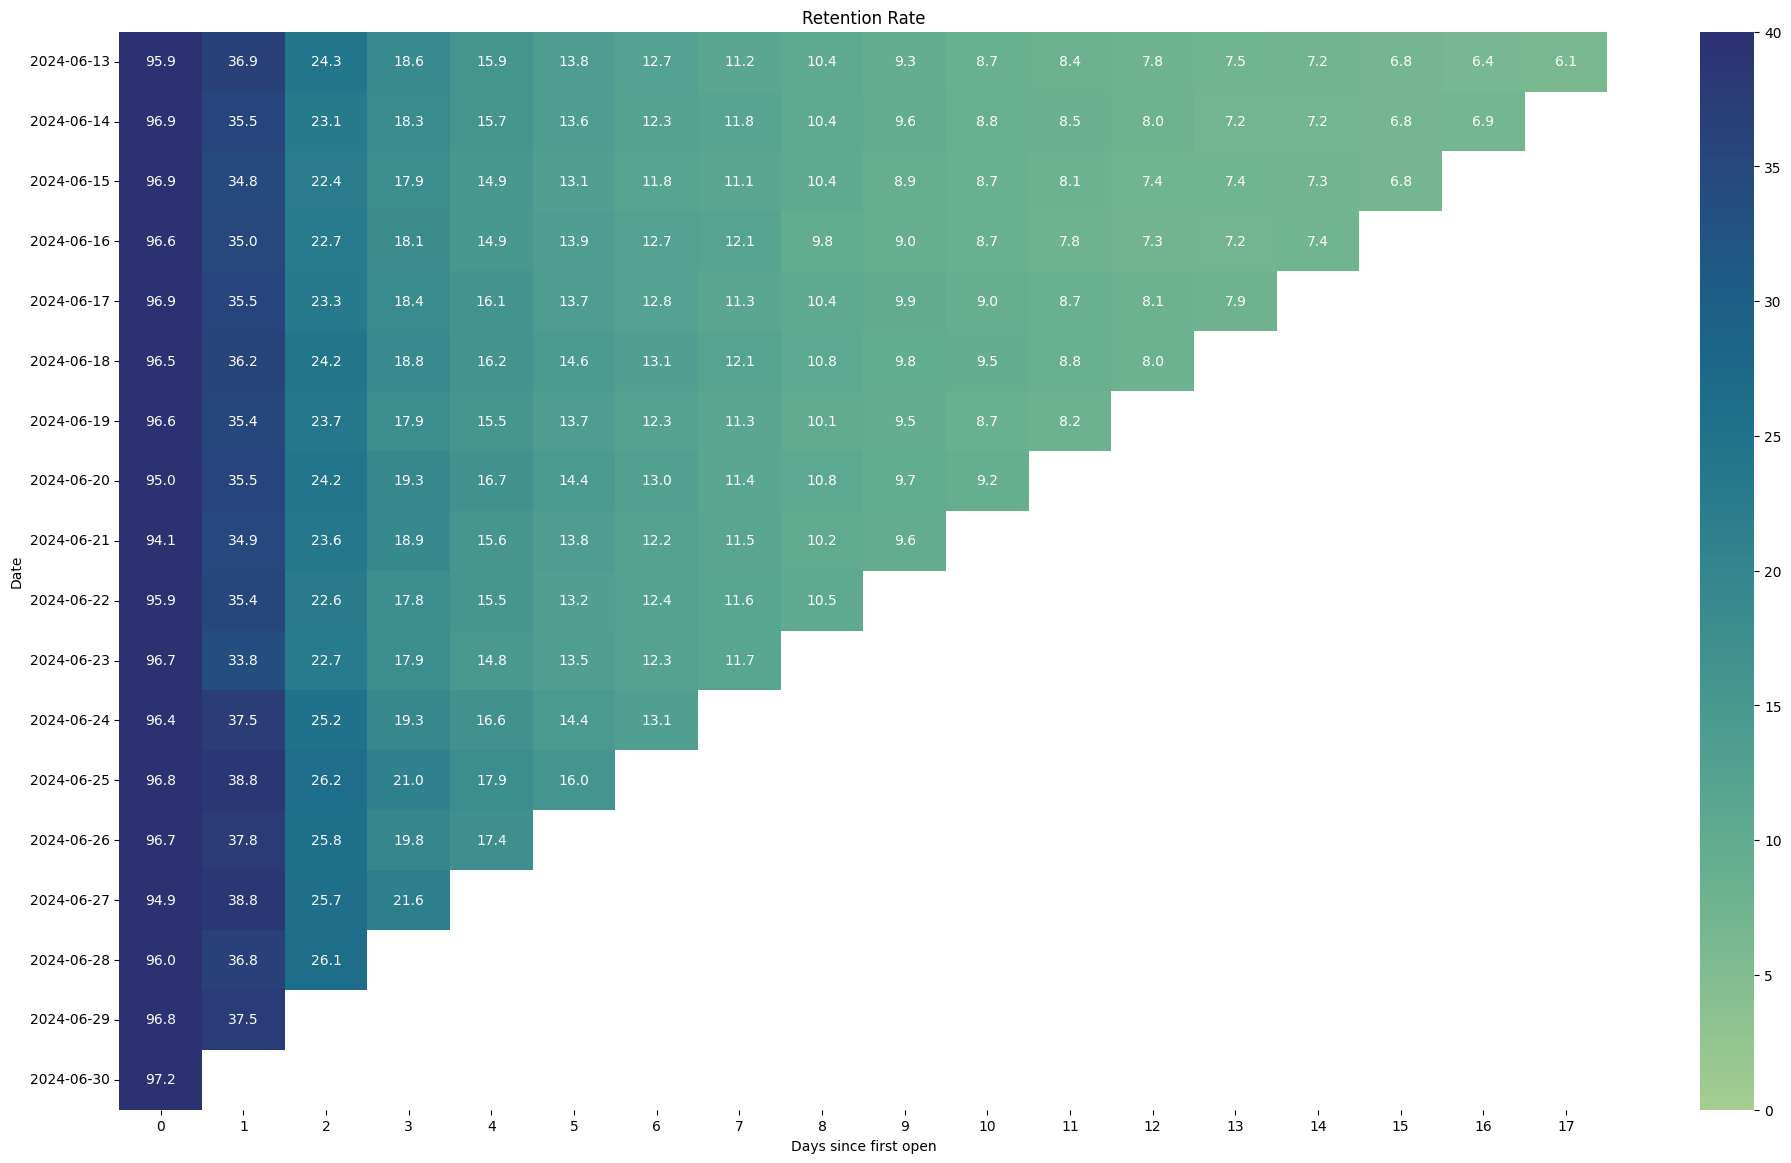

In [ ]:
# cohort 1.29.5
query = """
WITH cohort AS (
    SELECT
        user_pseudo_id,
        PARSE_DATE('%Y%m%d', event_date) as cohort_date
    FROM `royal-hexa-in-house.pixon_data_science.002_mock`
    WHERE event_name = 'first_open'
    and PARSE_DATE('%Y%m%d', event_date) >= '2024-06-13'
    and version = '1.29.5'
),
cohort_sizes AS (
    SELECT
        cohort_date,
        COUNT(DISTINCT user_pseudo_id) as total_users
    FROM cohort
    GROUP BY cohort_date
),
daily_retention AS (
    SELECT
        c.cohort_date,
        DATE_DIFF(PARSE_DATE('%Y%m%d', e.event_date), c.cohort_date, DAY) as days_since_first_open,
        COUNT(DISTINCT CASE WHEN (event_name = 'user_engagement') THEN e.user_pseudo_id END) as retained_users,
        cs.total_users
    FROM cohort c
    LEFT JOIN (select * from `royal-hexa-in-house.pixon_data_science.002_mock` where PARSE_DATE('%Y%m%d', event_date) >= '2024-06-13' and version = '1.29.5' ) e
        ON c.user_pseudo_id = e.user_pseudo_id
            AND PARSE_DATE('%Y%m%d', e.event_date) >= c.cohort_date
    JOIN cohort_sizes cs
        ON c.cohort_date = cs.cohort_date
    GROUP BY c.cohort_date, days_since_first_open, cs.total_users
)
SELECT
    cohort_date,
    days_since_first_open,
    retained_users,
    total_users,
    ROUND(retained_users * 100.0 / total_users, 2) as retention_rate
FROM daily_retention
-- WHERE days_since_first_open BETWEEN 0 AND 14
ORDER BY cohort_date, days_since_first_open;
"""

# Execute the query and load results into a pandas DataFrame
retention = client.query(query).to_dataframe()
retention

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Pivot the data for the heatmap
retention_pivot = retention.pivot(
    index='cohort_date',
    columns='days_since_first_open',
    values='retention_rate'
)

plt.figure(figsize=(24,14))
plt.title("Retention Rate  1.29.5")

ax = sns.heatmap(data=retention_pivot, annot=True, vmin=0, vmax=40, cmap='crest', fmt=".1f")

plt.xlabel('Days since first open')
plt.ylabel('Date')
plt.show()


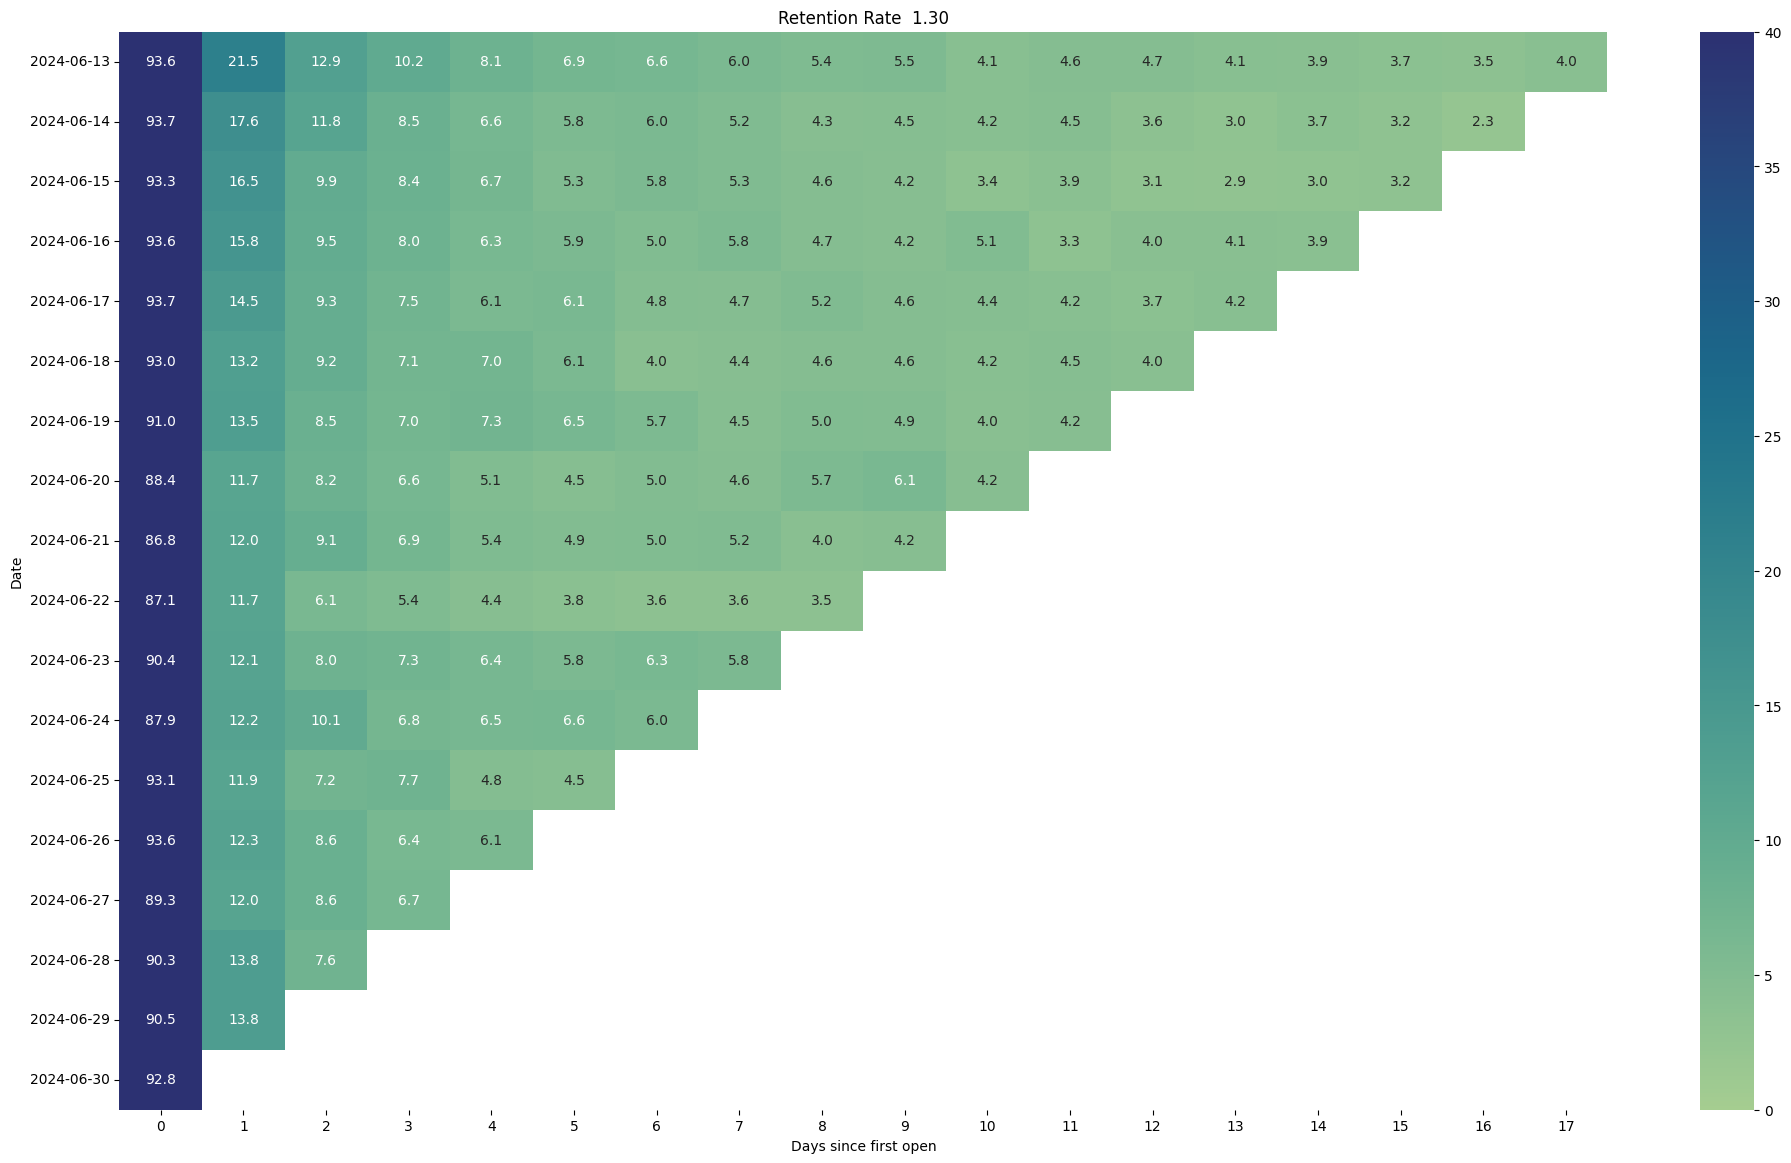

In [ ]:
query = """
WITH cohort AS (
    SELECT
        user_pseudo_id,
        PARSE_DATE('%Y%m%d', event_date) as cohort_date
    FROM `royal-hexa-in-house.pixon_data_science.002_mock`
    WHERE event_name = 'first_open'
    and PARSE_DATE('%Y%m%d', event_date) >= '2024-06-13'
    and version = '1.30'
),
cohort_sizes AS (
    SELECT
        cohort_date,
        COUNT(DISTINCT user_pseudo_id) as total_users
    FROM cohort
    GROUP BY cohort_date
),
daily_retention AS (
    SELECT
        c.cohort_date,
        DATE_DIFF(PARSE_DATE('%Y%m%d', e.event_date), c.cohort_date, DAY) as days_since_first_open,
        COUNT(DISTINCT CASE WHEN (event_name = 'user_engagement') THEN e.user_pseudo_id END) as retained_users,
        cs.total_users
    FROM cohort c
    LEFT JOIN (select * from `royal-hexa-in-house.pixon_data_science.002_mock` where PARSE_DATE('%Y%m%d', event_date) >= '2024-06-13' and version = '1.30' ) e
        ON c.user_pseudo_id = e.user_pseudo_id
            AND PARSE_DATE('%Y%m%d', e.event_date) >= c.cohort_date
    JOIN cohort_sizes cs
        ON c.cohort_date = cs.cohort_date
    GROUP BY c.cohort_date, days_since_first_open, cs.total_users
)
SELECT
    cohort_date,
    days_since_first_open,
    retained_users,
    total_users,
    ROUND(retained_users * 100.0 / total_users, 2) as retention_rate
FROM daily_retention
-- WHERE days_since_first_open BETWEEN 0 AND 14
ORDER BY cohort_date, days_since_first_open;
"""

# Execute the query and load results into a pandas DataFrame
retention_1_30 = client.query(query).to_dataframe()
#retention_1_30

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Pivot the data for the heatmap
retention_1_30_pivot = retention_1_30.pivot(
    index='cohort_date',
    columns='days_since_first_open',
    values='retention_rate'
)

plt.figure(figsize=(24,14))
plt.title("Retention Rate  1.30")

ax = sns.heatmap(data=retention_1_30_pivot, annot=True, vmin=0, vmax=40, cmap='crest', fmt=".1f")

plt.xlabel('Days since first open')
plt.ylabel('Date')
plt.show()



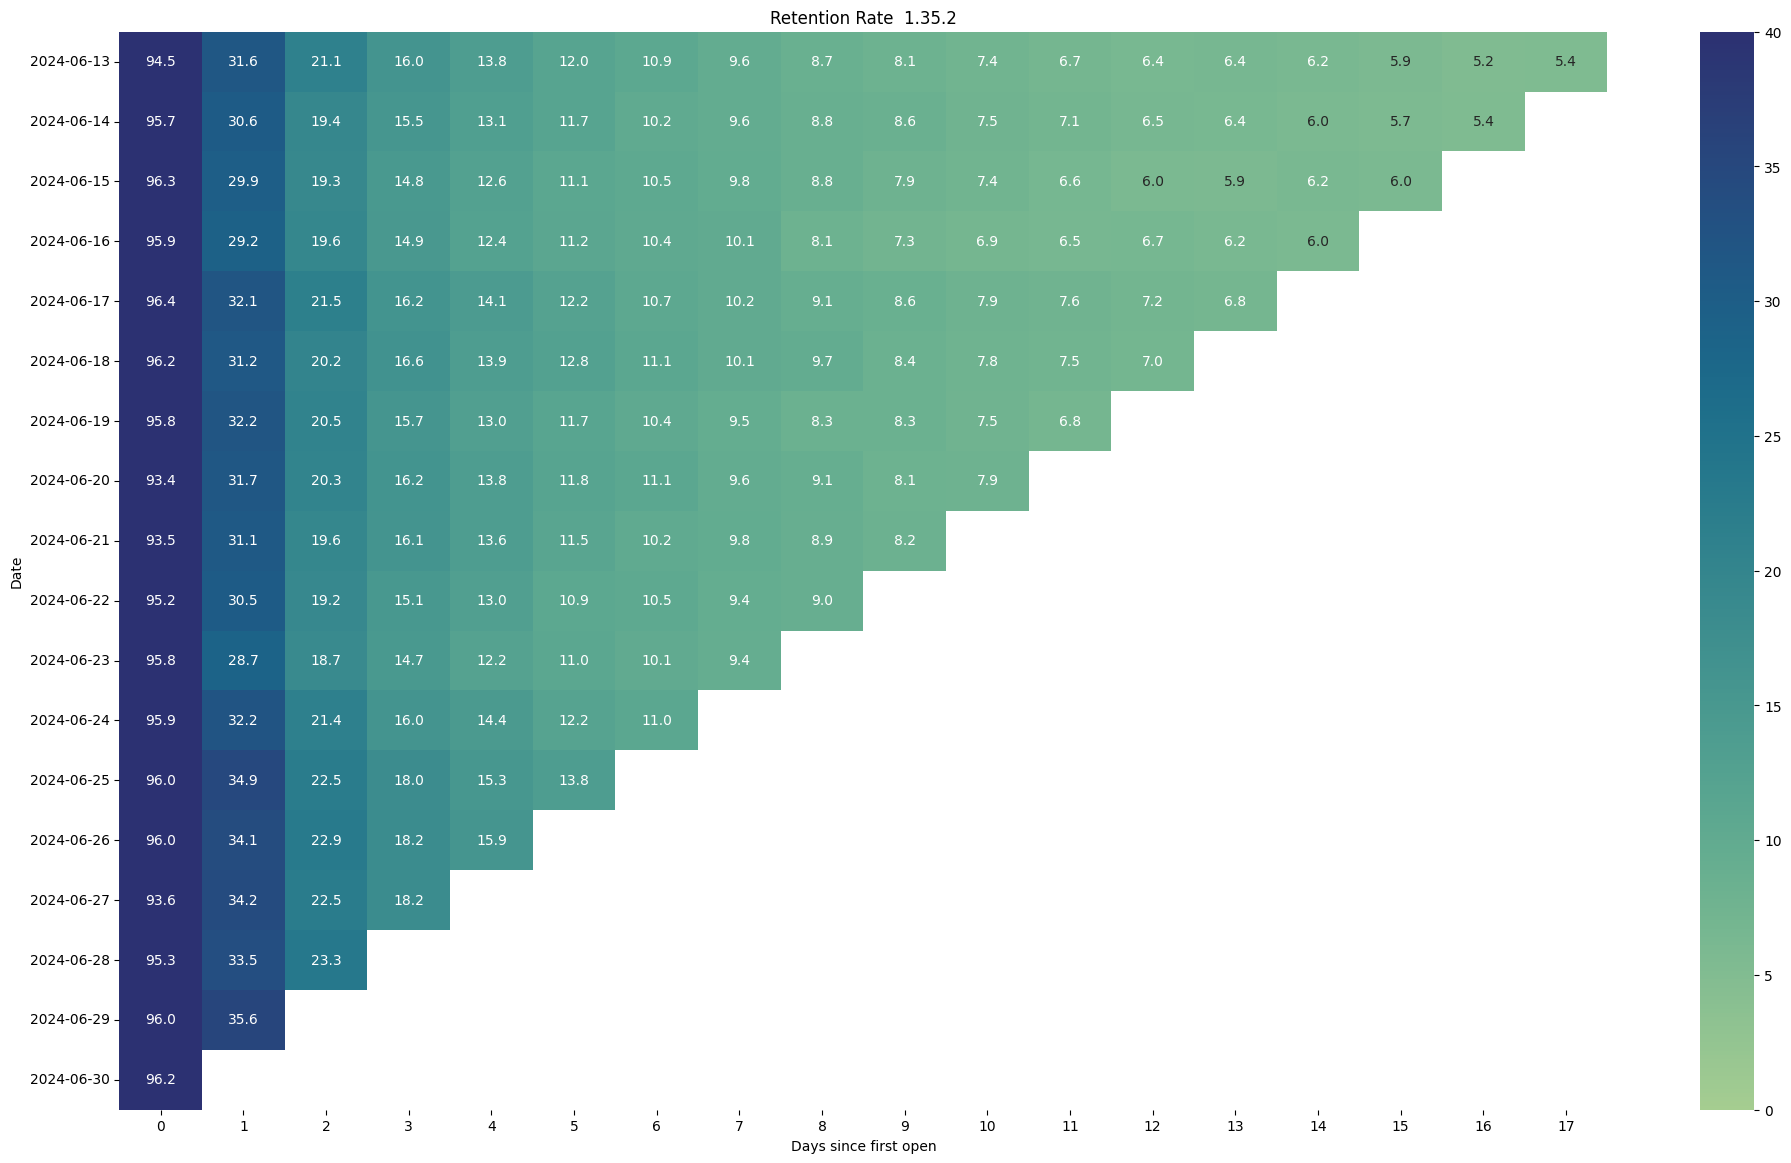

In [ ]:
query = """
WITH cohort AS (
    SELECT
        user_pseudo_id,
        PARSE_DATE('%Y%m%d', event_date) as cohort_date
    FROM `royal-hexa-in-house.pixon_data_science.002_mock`
    WHERE event_name = 'first_open'
    and PARSE_DATE('%Y%m%d', event_date) >= '2024-06-13'
    and version = '1.35.2'
),
cohort_sizes AS (
    SELECT
        cohort_date,
        COUNT(DISTINCT user_pseudo_id) as total_users
    FROM cohort
    GROUP BY cohort_date
),
daily_retention AS (
    SELECT
        c.cohort_date,
        DATE_DIFF(PARSE_DATE('%Y%m%d', e.event_date), c.cohort_date, DAY) as days_since_first_open,
        COUNT(DISTINCT CASE WHEN (event_name = 'user_engagement') THEN e.user_pseudo_id END) as retained_users,
        cs.total_users
    FROM cohort c
    LEFT JOIN (select * from `royal-hexa-in-house.pixon_data_science.002_mock` where PARSE_DATE('%Y%m%d', event_date) >= '2024-06-13' and version = '1.35.2' ) e
        ON c.user_pseudo_id = e.user_pseudo_id
            AND PARSE_DATE('%Y%m%d', e.event_date) >= c.cohort_date
    JOIN cohort_sizes cs
        ON c.cohort_date = cs.cohort_date
    GROUP BY c.cohort_date, days_since_first_open, cs.total_users
)
SELECT
    cohort_date,
    days_since_first_open,
    retained_users,
    total_users,
    ROUND(retained_users * 100.0 / total_users, 2) as retention_rate
FROM daily_retention
-- WHERE days_since_first_open BETWEEN 0 AND 14
ORDER BY cohort_date, days_since_first_open;
"""

# Execute the query and load results into a pandas DataFrame
retention_1_35_2 = client.query(query).to_dataframe()
#retention_1_35_2

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Pivot the data for the heatmap
retention_1_35_2_pivot = retention_1_35_2.pivot(
    index='cohort_date',
    columns='days_since_first_open',
    values='retention_rate'
)

plt.figure(figsize=(24,14))
plt.title("Retention Rate  1.35.2")

ax = sns.heatmap(data=retention_1_35_2_pivot, annot=True, vmin=0, vmax=40, cmap='crest', fmt=".1f")

plt.xlabel('Days since first open')
plt.ylabel('Date')
plt.show()



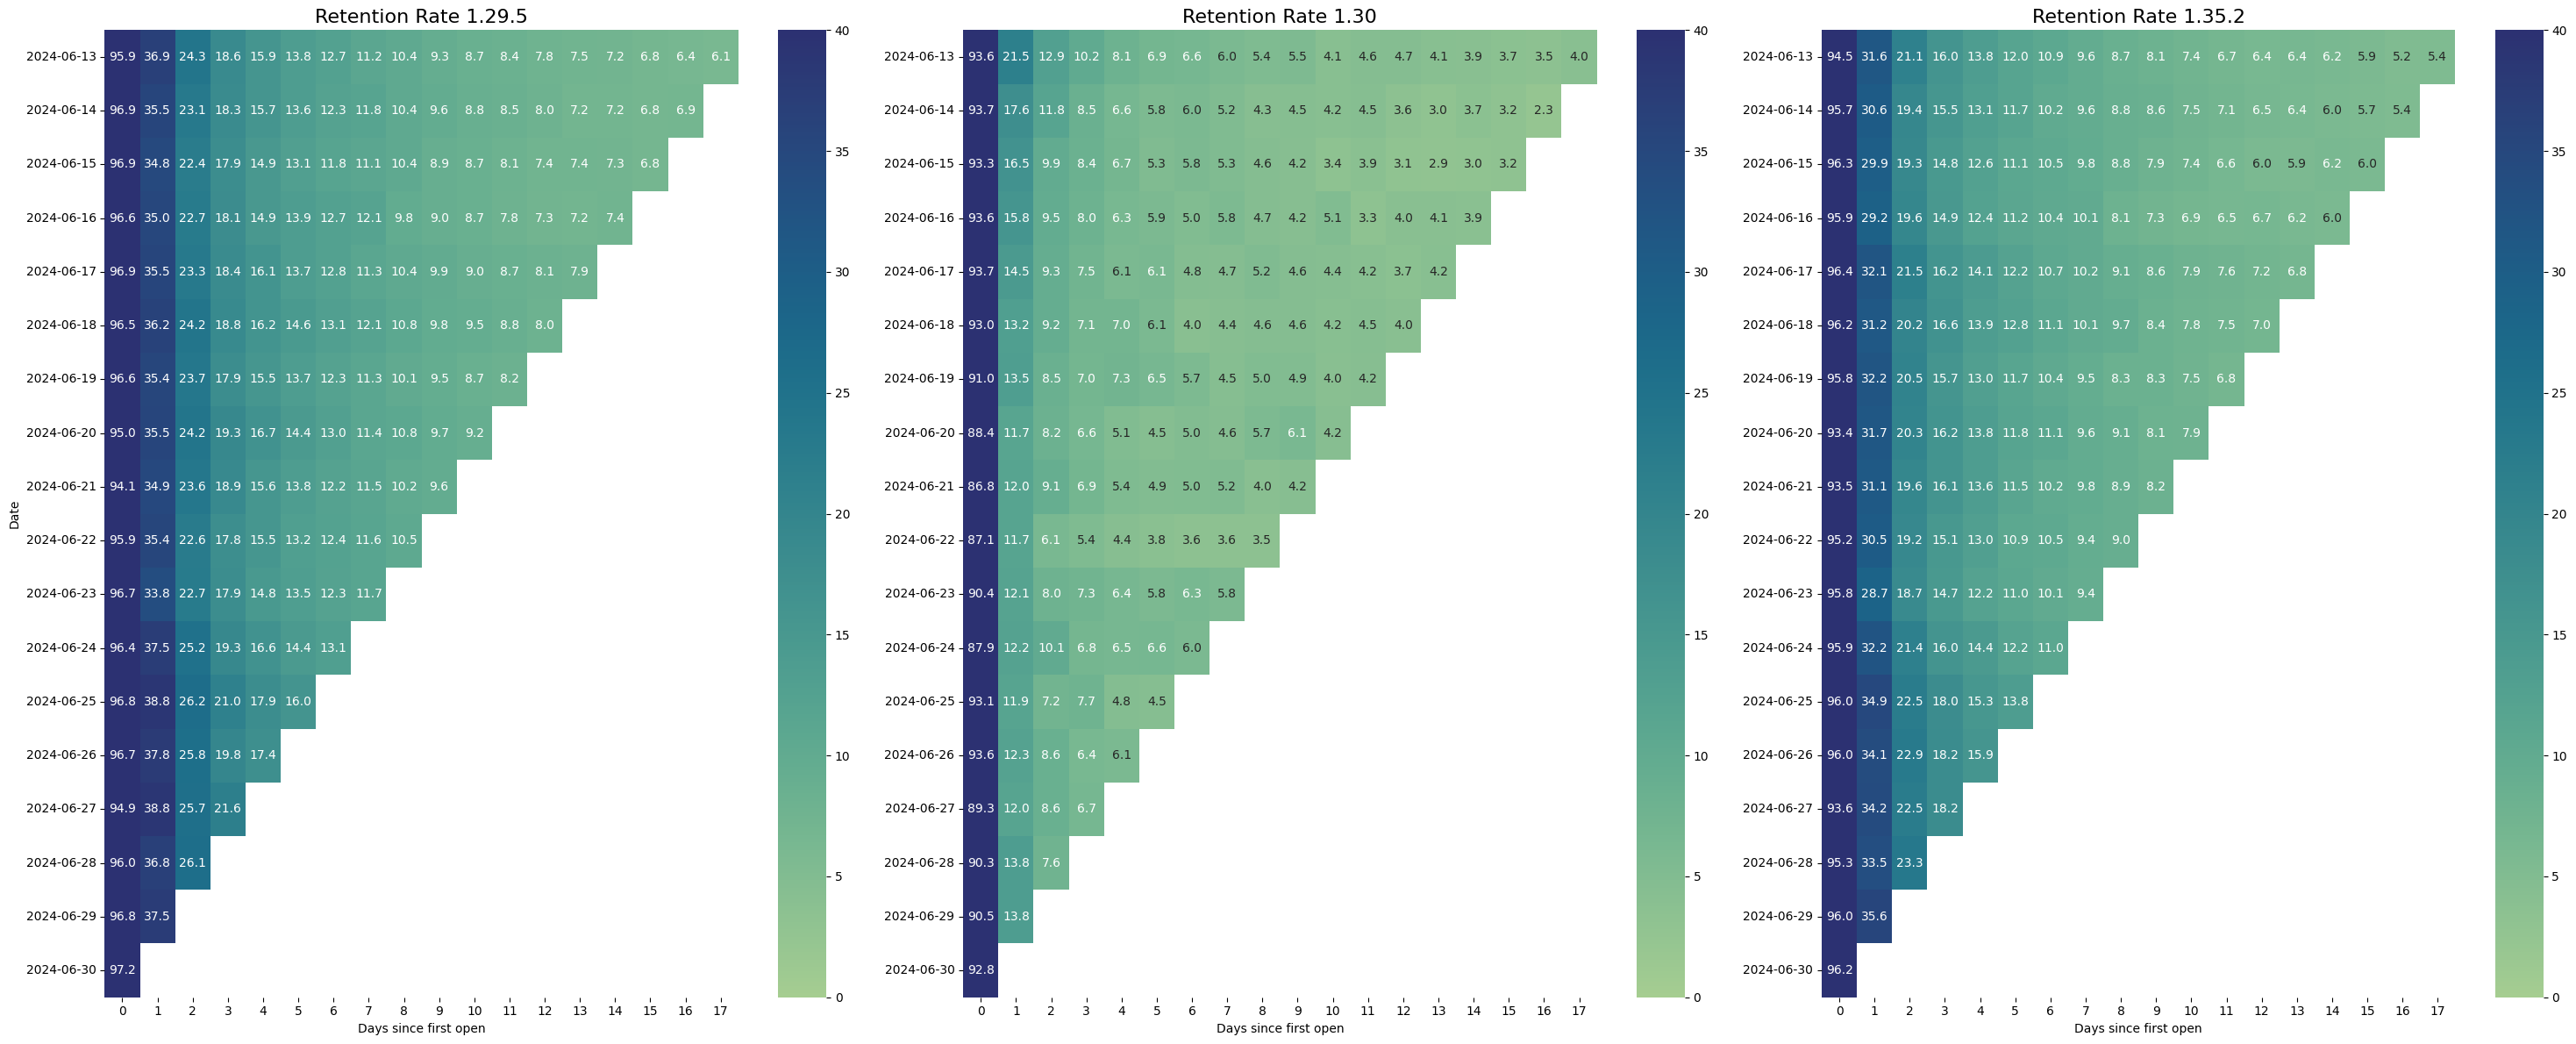

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo figure với 3 subplot (1 hàng, 3 cột)
fig, axes = plt.subplots(1, 3, figsize=(30, 12))

# Heatmap cho phiên bản 1.29.5
sns.heatmap(data=retention_pivot, annot=True, vmin=0, vmax=40, cmap='crest', fmt=".1f", ax=axes[0])
axes[0].set_title("Retention Rate 1.29.5", fontsize=16)
axes[0].set_xlabel('Days since first open')
axes[0].set_ylabel('Date')

# Heatmap cho phiên bản 1.30
sns.heatmap(data=retention_1_30_pivot, annot=True, vmin=0, vmax=40, cmap='crest', fmt=".1f", ax=axes[1])
axes[1].set_title("Retention Rate 1.30", fontsize=16)
axes[1].set_xlabel('Days since first open')
axes[1].set_ylabel('')

# Heatmap cho phiên bản 1.35.2
sns.heatmap(data=retention_1_35_2_pivot, annot=True, vmin=0, vmax=40, cmap='crest', fmt=".1f", ax=axes[2])
axes[2].set_title("Retention Rate 1.35.2", fontsize=16)
axes[2].set_xlabel('Days since first open')
axes[2].set_ylabel('')

# Căn chỉnh layout để các heatmap không bị chồng lên nhau
plt.tight_layout()
plt.show()


**So sánh về chỉ số retention:**
- Version 1.29.5 tốt hơn cả 2 version còn lại về tất cả các ngày (lý giải cho việc DAU của 1.29.5 luôn tốt đều theo từng ngày).
- Theo sau là version 1.35.2.
- Version 1.30 là tệ nhất (lý giải cho việc DAU của 1.30 thấp dần theo thời gian).


### So sánh chỉ số playtime

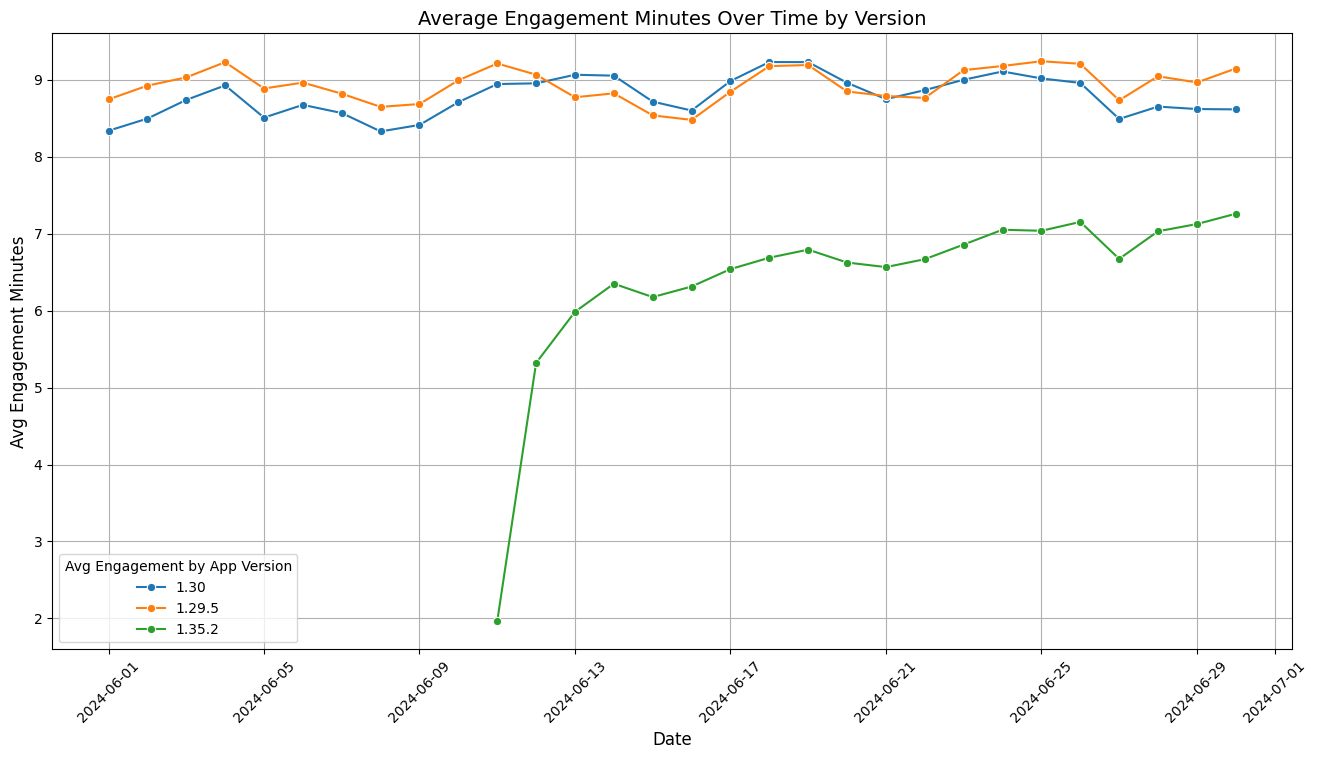

In [ ]:
query ="""
SELECT date_par,
       version,
       sum((SELECT value.int_value FROM UNNEST(event_params) WHERE key = 'engagement_time_msec'))
       / count(distinct user_pseudo_id) --user active
       / 60000 AS avg_engage_minutes,
FROM `royal-hexa-in-house.pixon_data_science.002_mock`
WHERE event_name = 'user_engagement'
AND version IN ('1.29.5', '1.30', '1.35.2')
GROUP BY date_par, version
ORDER BY date_par;
"""
playtime = client.query(query).to_dataframe()
# Vẽ biểu đồ line chart với Seaborn
plt.figure(figsize=(16, 8))
sns.lineplot(data=playtime, x='date_par', y='avg_engage_minutes', hue='version', marker='o')

# Tùy chỉnh biểu đồ
plt.title("Average Engagement Minutes Over Time by Version", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Avg Engagement Minutes", fontsize=12)
plt.xticks(rotation=45)  # Xoay nhãn ngày cho dễ đọc
plt.legend(title="Avg Engagement by App Version")
plt.grid(True)

# Hiển thị biểu đồ
plt.show()

Version 1.35.2 có time chơi trung bình thấp hơn hẳn so với 2 version còn lại

2 version còn lại có time chơi trung bình ngang nhau

### Level Churn, Phân tích level

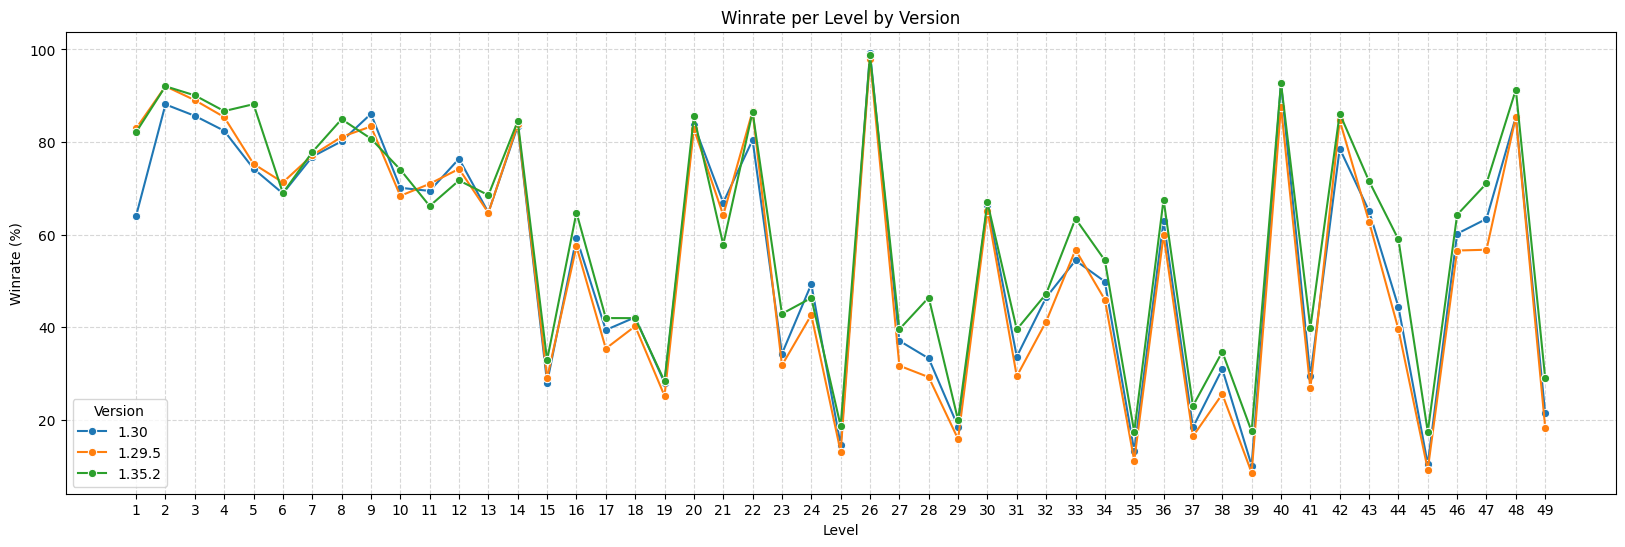

In [ ]:
query = """
SELECT
  SAFE_CAST(level AS STRING) AS level,
  version,
  SAFE_DIVIDE(
    COUNT(CASE WHEN event_name = 'win_level'  THEN user_pseudo_id END),
    COUNT(CASE WHEN event_name = 'start_level' THEN user_pseudo_id END)
  ) * 100 AS winrate,  -- Sử dụng SAFE_DIVIDE để tránh lỗi chia cho 0
  COUNT(CASE WHEN event_name = 'start_level' THEN user_pseudo_id END) AS event_start,
  COUNT(CASE WHEN event_name = 'win_level'  THEN user_pseudo_id END) AS event_win,
  COUNT(DISTINCT CASE WHEN event_name = 'start_level' THEN user_pseudo_id END) AS user_start,
  COUNT(DISTINCT CASE WHEN event_name = 'win_level'  THEN user_pseudo_id END) AS user_win
FROM
(
  SELECT
    user_pseudo_id,
    event_name,
    version,
    COALESCE(
      (SELECT SAFE_CAST(value.int_value AS STRING) FROM UNNEST(event_params) WHERE KEY = 'level'),
      (SELECT value.string_value FROM UNNEST(event_params) WHERE KEY = 'level')
    ) AS level
  FROM `royal-hexa-in-house.pixon_data_science.002_mock`
  WHERE event_name IN ('start_level', 'win_level','')
  AND date_par BETWEEN '2024-06-15' AND '2024-06-30'
  AND version IN ('1.29.5', '1.30', '1.35.2')
  AND user_pseudo_id in (select user_pseudo_id from `royal-hexa-in-house.pixon_data_science.002_mock` where event_name = 'first_open' and version in ('1.29.5', '1.30', '1.35.2') and date_par between '2024-06-13' and '2024-06-15')
)
GROUP BY level, version
HAVING SAFE_CAST(level AS INT64) < 50
ORDER BY SAFE_CAST(level AS INT64);
"""

winrate = client.query(query).to_dataframe()

# Vẽ
plt.figure(figsize=(20, 6))
sns.lineplot(data=winrate, x="level", y="winrate", hue="version", marker="o")

plt.title("Winrate per Level by Version")
plt.xlabel("Level")
plt.ylabel("Winrate (%)")
plt.legend(title="Version")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


Version 1.35.2 có độ khó thấp hơn 2 version còn lại ở 1 vài level

In [ ]:
winrate_df = winrate.copy()

In [ ]:
import pandas as pd
# Ensure that 'version' is treated as a string to match correctly
winrate_df['version'] = winrate_df['version'].astype(str)

# Convert 'level' to numeric, forcing any non-numeric entries to NaN
winrate_df['level'] = pd.to_numeric(winrate_df['level'], errors='coerce')

# Drop rows where level is NaN (caused by non-numeric levels)
winrate_df = winrate_df.dropna(subset=['level'])

# Create a dictionary mapping version to user_start of level 1
level_1_user_start = winrate_df[winrate_df['level'] == 1].set_index('version')['user_start'].to_dict()

# Map the dictionary to create the user_drop column
winrate_df['user_drop'] = winrate_df.apply(lambda row: row['user_start'] / level_1_user_start.get(str(row['version']), float('nan')), axis=1)
winrate_df



,level,version,winrate,event_start,event_win,user_start,user_win,user_drop
0,1,1.30,64.034152,2811,1800,2319,1797,1.000000
1,1,1.29.5,82.923490,19723,16355,17491,16318,1.000000
2,1,1.35.2,82.127352,11056,9080,9994,9063,1.000000
3,2,1.30,88.116243,1927,1698,1829,1697,0.788702
4,2,1.35.2,92.035674,9643,8875,9157,8855,0.916250
...,...,...,...,...,...,...,...,...
142,48,1.29.5,85.423227,5399,4612,4615,4602,0.263850
143,48,1.35.2,91.312300,2187,1997,2003,1993,0.200420
144,49,1.30,21.357410,1606,343,352,342,0.151790
145,49,1.35.2,28.948940,6698,1939,2019,1934,0.202021


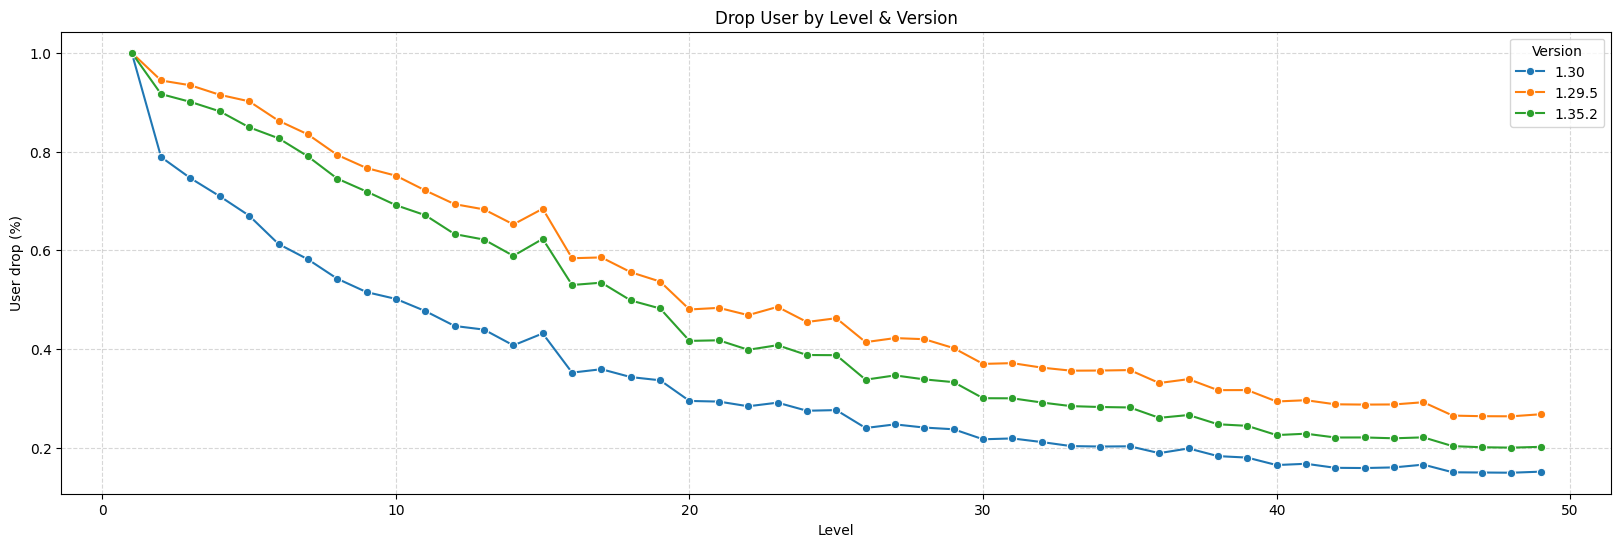

In [ ]:
# Vẽ
plt.figure(figsize=(20, 6))
sns.lineplot(data= winrate_df, x="level", y="user_drop", hue="version", marker="o")

plt.title("Drop User by Level & Version")
plt.xlabel("Level")
plt.ylabel("User drop (%)")
plt.legend(title="Version")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

Version 1.30 lại có bộ level giữ chân user tốt hơn 2 version còn lại trong 50 level đâu

### Phân tích doanh thu theo version

#### Tổng doanh thu trong 15 ngày đối với từng version

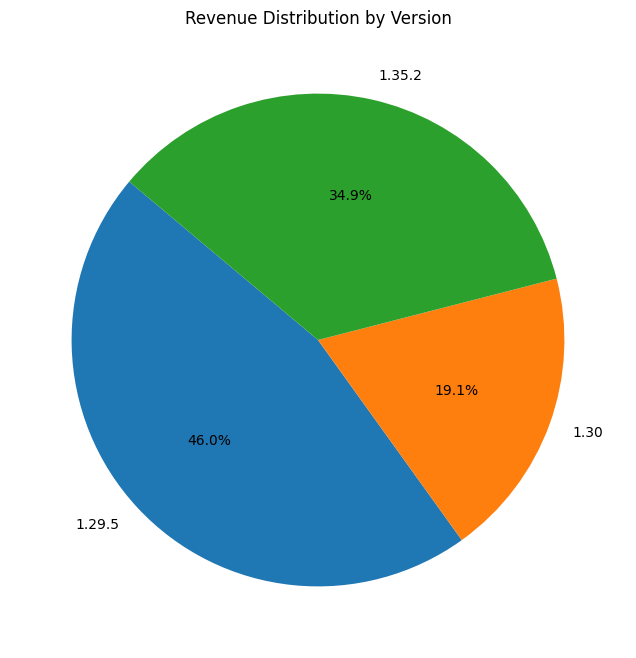

In [ ]:
query = """
-- Rev from iap per day
with iap as(
select version, sum(event_value_in_usd) as revenue_from_iap_InUSD FROM `royal-hexa-in-house.pixon_data_science.002_mock` WHERE event_name = 'in_app_purchase' and date_par >= '2024-06-15' AND version IN ('1.29.5', '1.30', '1.35.2')
group by version),
ads as (-- Rev from ads per day
SELECT version, SUM(value) AS revenue_from_ad FROM ( SELECT version, (SELECT value.double_value FROM UNNEST(event_params) WHERE KEY = 'value') AS value FROM `royal-hexa-in-house.pixon_data_science.002_mock`
WHERE event_name = 'ad_impression' and date_par >= '2024-06-15' AND version IN ('1.29.5', '1.30', '1.35.2') ) group by version)
select iap.version, revenue_from_iap_InUSD + revenue_from_ad as total_revenue
from iap join ads on iap.version = ads.version
"""
revenue_15_days = client.query(query).to_dataframe()
plt.figure(figsize=(8, 8))
plt.pie(revenue_15_days['total_revenue'], labels=revenue_15_days['version'], autopct='%1.1f%%', startangle=140)
plt.title('Revenue Distribution by Version')
plt.show()

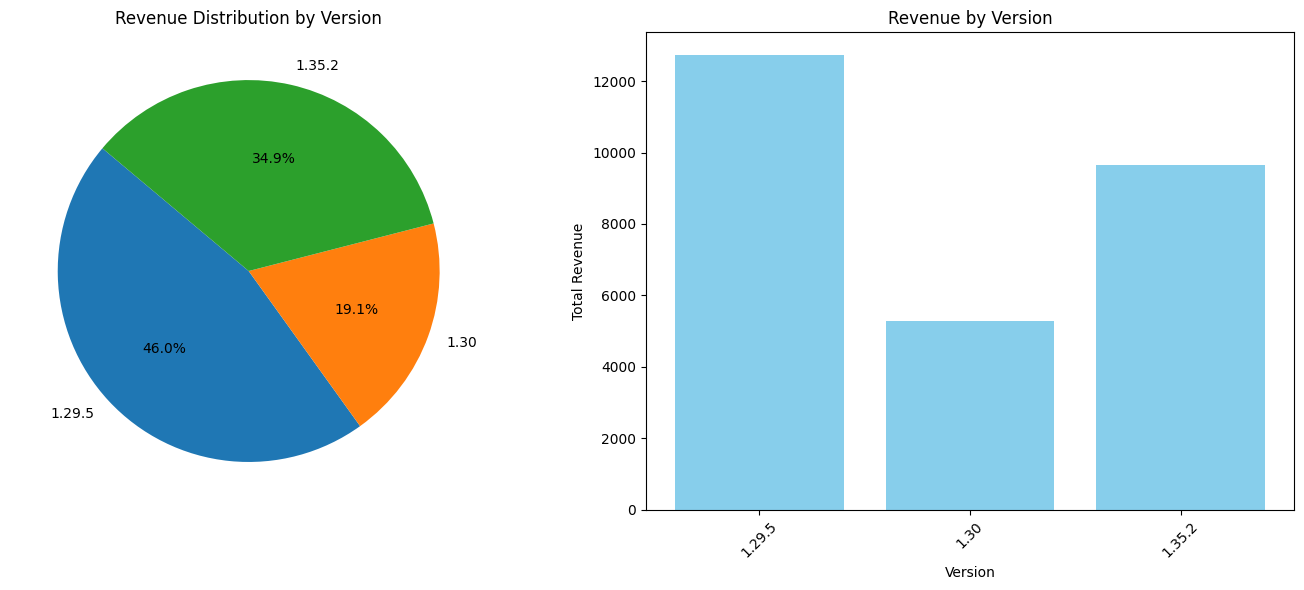

In [ ]:
import matplotlib.pyplot as plt

# Tạo figure với 2 subplot (1 hàng, 2 cột)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Vẽ biểu đồ tròn
axes[0].pie(revenue_15_days['total_revenue'], labels=revenue_15_days['version'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Revenue Distribution by Version')

# Vẽ biểu đồ cột
axes[1].bar(revenue_15_days['version'], revenue_15_days['total_revenue'], color='skyblue')
axes[1].set_title('Revenue by Version')
axes[1].set_xlabel('Version')
axes[1].set_ylabel('Total Revenue')
axes[1].tick_params(axis='x', rotation=45)  # Xoay nhãn trục x để dễ đọc

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


#### ARPU by version in 15 days

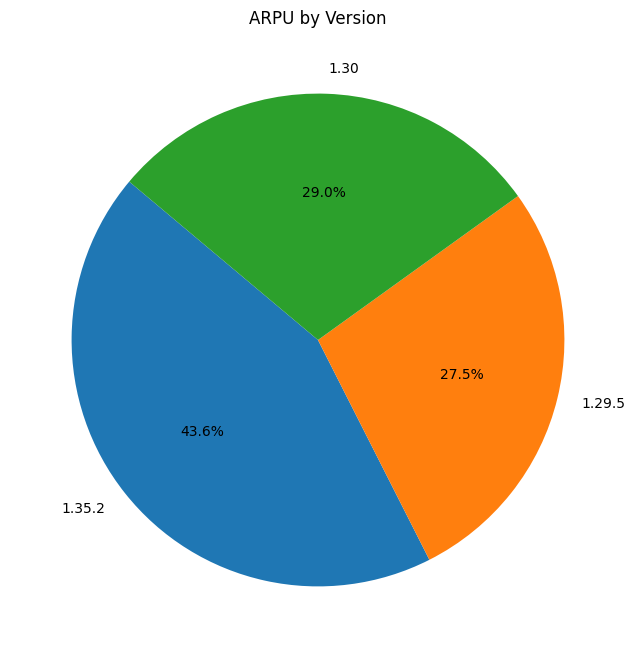

In [ ]:
QUERY = """-- Rev from iap per day
with iap as(
select version, sum(event_value_in_usd) as revenue_from_iap_InUSD FROM `royal-hexa-in-house.pixon_data_science.002_mock` WHERE event_name = 'in_app_purchase' and date_par >= '2024-06-15'  AND version IN ('1.29.5', '1.30', '1.35.2')
group by version),
ads as (-- Rev from ads per day
SELECT version, SUM(value) AS revenue_from_ad FROM ( SELECT version, (SELECT value.double_value FROM UNNEST(event_params) WHERE KEY = 'value') AS value FROM `royal-hexa-in-house.pixon_data_science.002_mock`
WHERE event_name = 'ad_impression' and date_par >= '2024-06-15'  AND version IN ('1.29.5', '1.30', '1.35.2') ) group by version),
user as(
select version, count(distinct user_pseudo_id) as num_user
FROM `royal-hexa-in-house.pixon_data_science.002_mock`
WHERE event_name = 'user_engagement' and date_par >= '2024-06-15'  AND version IN ('1.29.5', '1.30', '1.35.2')
group by version
)
select iap.version,
     revenue_from_iap_InUSD + revenue_from_ad as total_revenue,
     (revenue_from_iap_InUSD + revenue_from_ad)/num_user as ARPU
from iap join ads on iap.version = ads.version join user on user.version = ads.version
"""
ARPU = client.query(QUERY).to_dataframe()
plt.figure(figsize=(8, 8))
plt.pie(ARPU['ARPU'], labels=ARPU['version'], autopct='%1.1f%%', startangle=140)
plt.title('ARPU by Version')
plt.show()

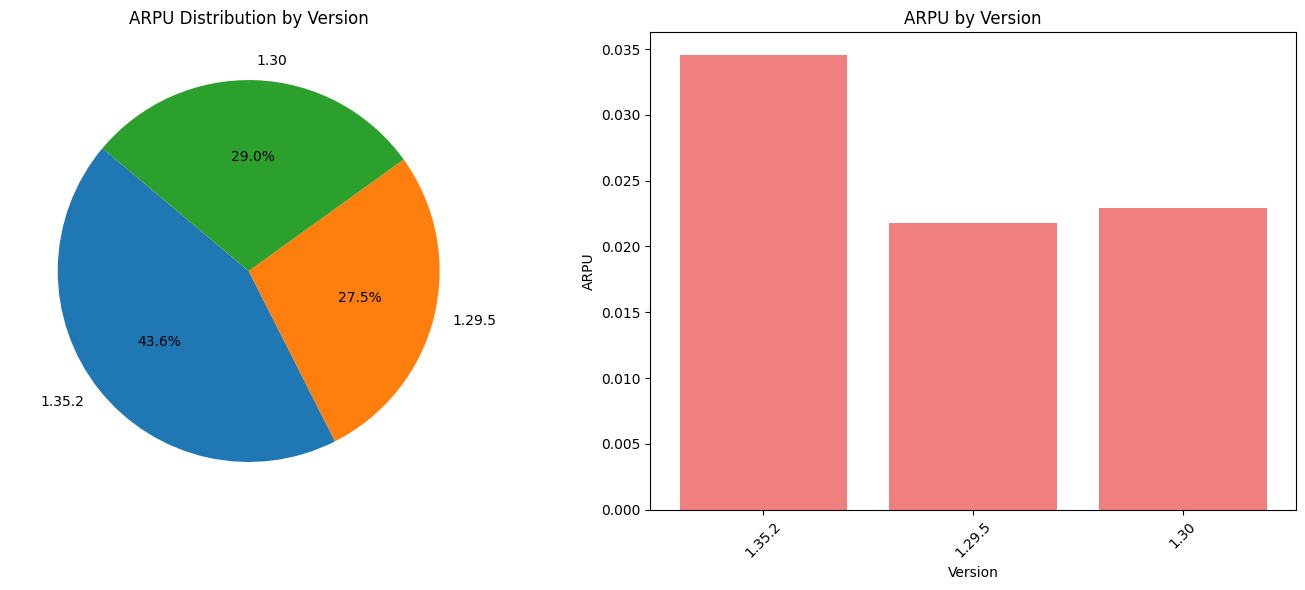

In [ ]:
import matplotlib.pyplot as plt

# Truy vấn dữ liệu
ARPU = client.query(QUERY).to_dataframe()

# Tạo figure với 2 subplot (1 hàng, 2 cột)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Vẽ biểu đồ tròn
axes[0].pie(ARPU['ARPU'], labels=ARPU['version'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('ARPU Distribution by Version')

# Vẽ biểu đồ cột
axes[1].bar(ARPU['version'], ARPU['ARPU'], color='lightcoral')
axes[1].set_title('ARPU by Version')
axes[1].set_xlabel('Version')
axes[1].set_ylabel('ARPU')
axes[1].tick_params(axis='x', rotation=45)  # Xoay nhãn trục x để dễ đọc

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


 Version 1.29.5 có ARPU là cao nhất, gấp đôi 2 version còn lại

#### ARPU by days

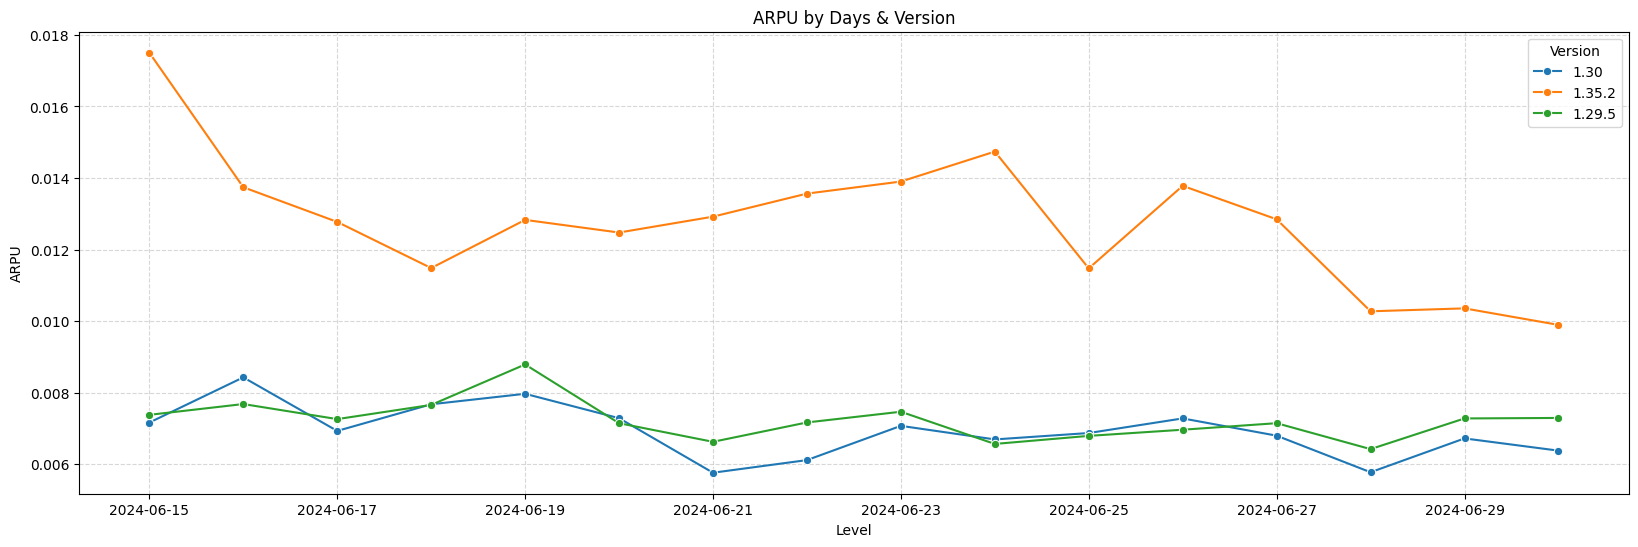

In [ ]:
QUERY = """-- Rev from iap per day
with iap as(
select date_par, version, sum(event_value_in_usd) as revenue_from_iap_InUSD
FROM `royal-hexa-in-house.pixon_data_science.002_mock` WHERE event_name = 'in_app_purchase' and date_par >= '2024-06-15'  AND version IN ('1.29.5', '1.30', '1.35.2')
group by version, date_par),
ads as (
SELECT version,date_par, SUM(value) AS revenue_from_ad
FROM ( SELECT version,date_par, (SELECT value.double_value FROM UNNEST(event_params) WHERE KEY = 'value') AS value FROM `royal-hexa-in-house.pixon_data_science.002_mock`
WHERE event_name = 'ad_impression' and date_par >= '2024-06-15'  AND version IN ('1.29.5', '1.30', '1.35.2') ) group by version, date_par),
user as(
select version,date_par, count(distinct user_pseudo_id) as num_user
FROM `royal-hexa-in-house.pixon_data_science.002_mock`
WHERE event_name = 'user_engagement' and date_par >= '2024-06-15'  AND version IN ('1.29.5', '1.30', '1.35.2')
group by version, date_par
)
select user.version,
     user.date_par,
     (revenue_from_iap_InUSD + revenue_from_ad)/num_user as ARPU
from iap join ads on iap.version = ads.version and iap.date_par = ads.date_par
 join user on user.version = ads.version and user.date_par = ads.date_par
"""
ARPU_by_days = client.query(QUERY).to_dataframe()

# Vẽ
plt.figure(figsize=(20, 6))
sns.lineplot(data= ARPU_by_days, x="date_par", y="ARPU", hue="version", marker="o")

plt.title("ARPU by Days & Version")
plt.xlabel("Level")
plt.ylabel("ARPU")
plt.legend(title="Version")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

Version 1.35.2 có doanh thu/ user tốt nhất, vượt trội hẳn so với 2 app_version còn lại

#### Doanh thu từ ads theo day, theo 3 version

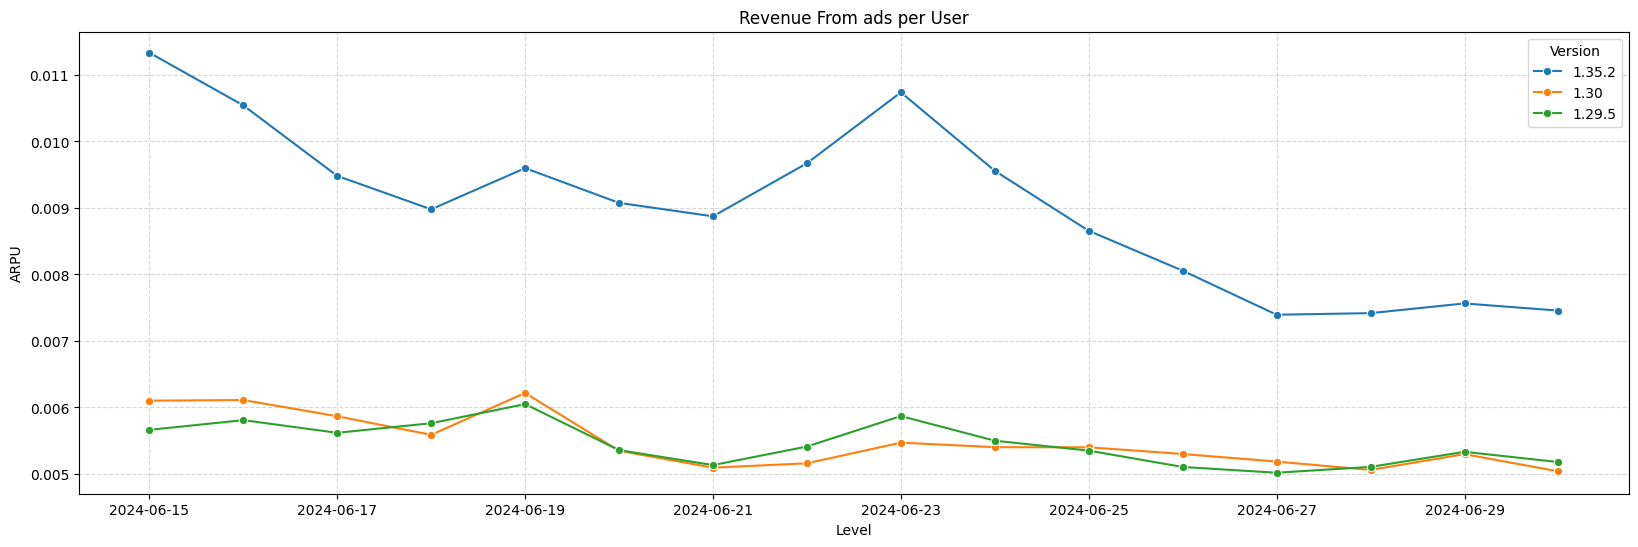

In [ ]:
QUERY = """
with ads as (
SELECT version,date_par, SUM(value) AS revenue_from_ad
FROM ( SELECT version,date_par, (SELECT value.double_value FROM UNNEST(event_params) WHERE KEY = 'value') AS value FROM `royal-hexa-in-house.pixon_data_science.002_mock`
WHERE event_name = 'ad_impression' and date_par >= '2024-06-15'  AND version IN ('1.29.5', '1.30', '1.35.2') ) group by version, date_par),
user as(
select version,date_par, count(distinct user_pseudo_id) as num_user
FROM `royal-hexa-in-house.pixon_data_science.002_mock`
WHERE event_name = 'user_engagement' and date_par >= '2024-06-15'  AND version IN ('1.29.5', '1.30', '1.35.2')
group by version, date_par
)
select user.version,
     user.date_par,
     revenue_from_ad/num_user as rev_ad_per_user
from user join ads on user.version = ads.version and user.date_par = ads.date_par
"""
rev_from_ads_by_days = client.query(QUERY).to_dataframe()
# Vẽ
plt.figure(figsize=(20, 6))
sns.lineplot(data= rev_from_ads_by_days, x="date_par", y="rev_ad_per_user", hue="version", marker="o")

plt.title("Revenue From ads per User")
plt.xlabel("Level")
plt.ylabel("ARPU")
plt.legend(title="Version")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

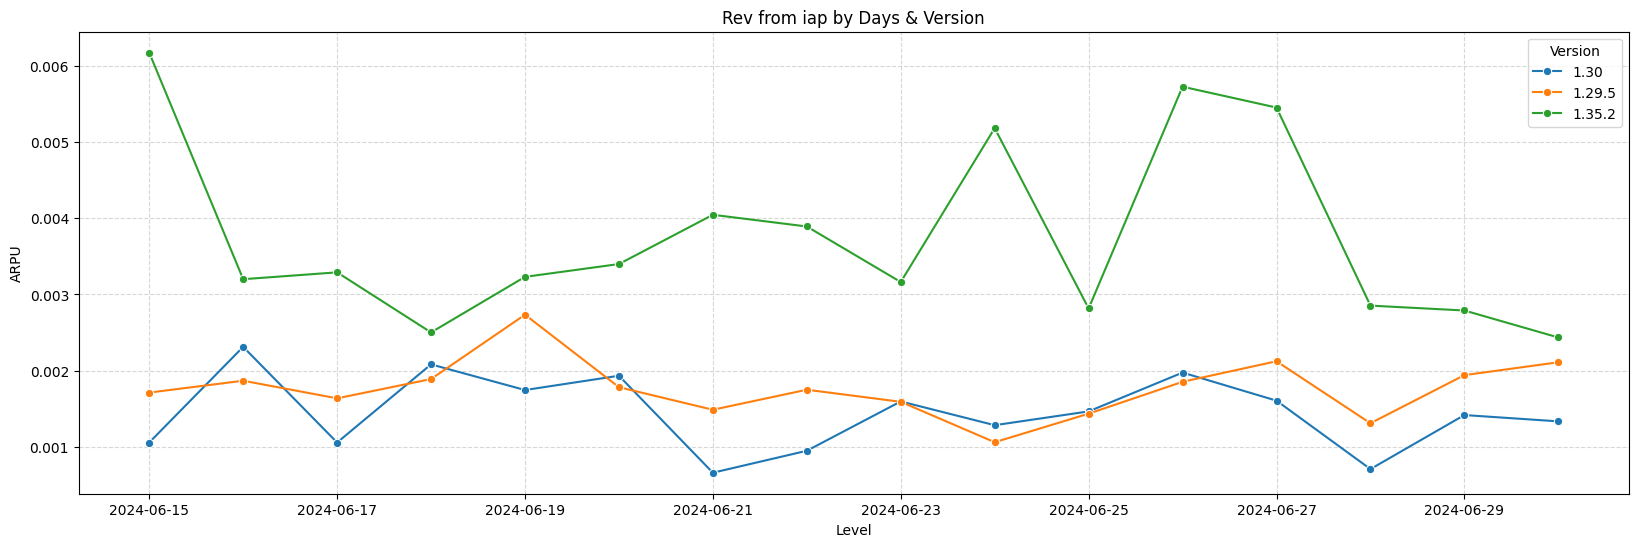

In [ ]:
QUERY = """-- Rev from iap per day
with iap as(
select date_par, version, sum(event_value_in_usd) as revenue_from_iap_InUSD
FROM `royal-hexa-in-house.pixon_data_science.002_mock` WHERE event_name = 'in_app_purchase' and date_par >= '2024-06-15'  AND version IN ('1.29.5', '1.30', '1.35.2')
group by version, date_par),
user as(
select version,date_par, count(distinct user_pseudo_id) as num_user
FROM `royal-hexa-in-house.pixon_data_science.002_mock`
WHERE event_name = 'user_engagement' and date_par >= '2024-06-15'  AND version IN ('1.29.5', '1.30', '1.35.2')
group by version, date_par
)
select user.version,
     user.date_par,
     revenue_from_iap_InUSD /num_user as rev_from_iap
from iap join user on iap.version = user.version and iap.date_par = user.date_par
"""
rev_from_iap_by_days = client.query(QUERY).to_dataframe()

# Vẽ
plt.figure(figsize=(20, 6))
sns.lineplot(data= rev_from_iap_by_days, x="date_par", y="rev_from_iap", hue="version", marker="o")

plt.title("Rev from iap by Days & Version")
plt.xlabel("Level")
plt.ylabel("ARPU")
plt.legend(title="Version")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

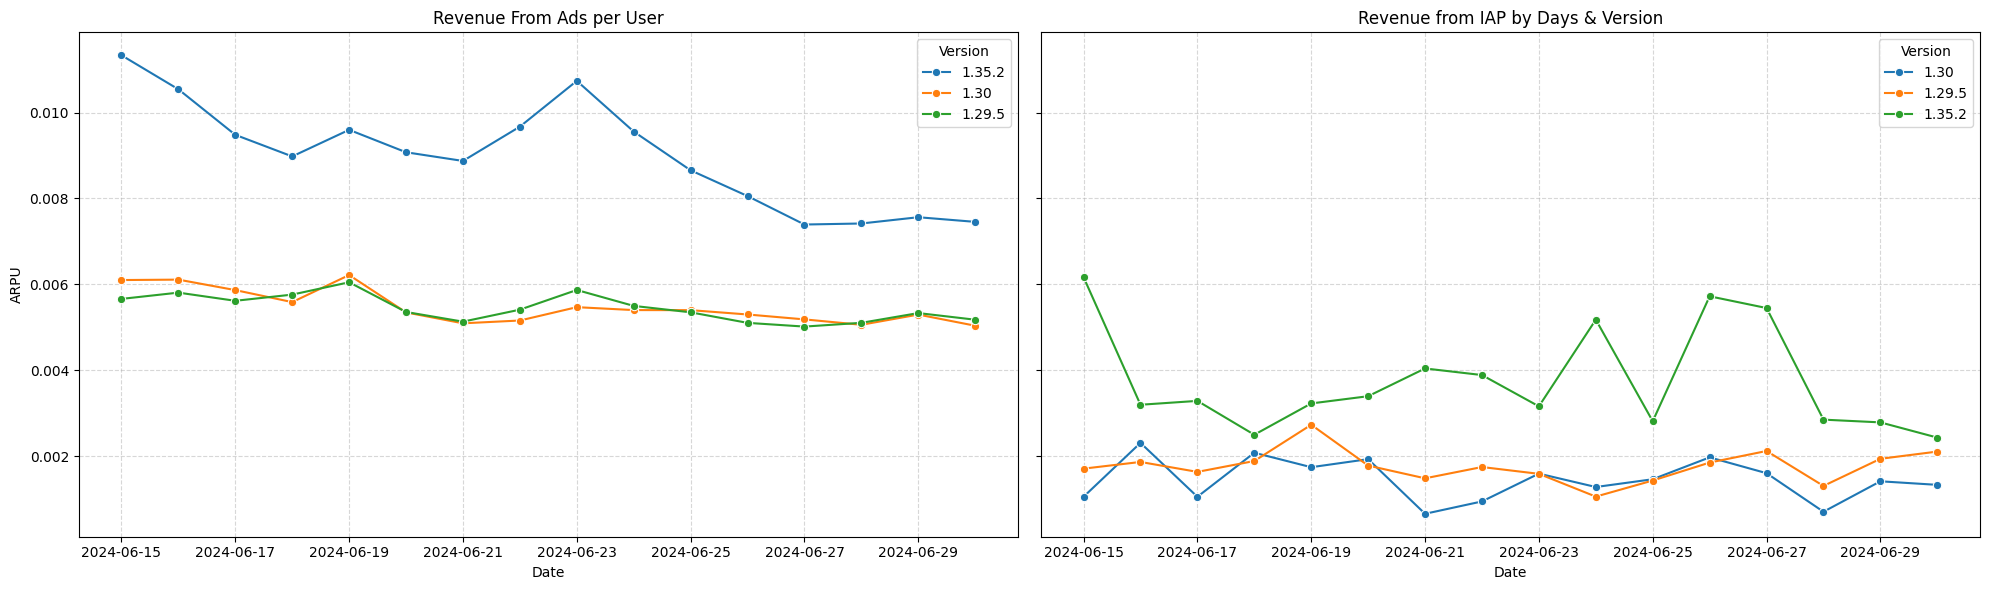

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 2 subplots (horizontally arranged)
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Plot 1: Revenue from ads per user
sns.lineplot(ax=axes[0], data=rev_from_ads_by_days, x="date_par", y="rev_ad_per_user", hue="version", marker="o")
axes[0].set_title("Revenue From Ads per User")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("ARPU")
axes[0].legend(title="Version")
axes[0].grid(True, linestyle="--", alpha=0.5)

# Plot 2: Revenue from IAP by days & version
sns.lineplot(ax=axes[1], data=rev_from_iap_by_days, x="date_par", y="rev_from_iap", hue="version", marker="o")
axes[1].set_title("Revenue from IAP by Days & Version")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("ARPU")
axes[1].legend(title="Version")
axes[1].grid(True, linestyle="--", alpha=0.5)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()


:Rev mang lại/ 1 user đến từ cả ads và iap của version 1.35.2 đều tốt hơn 2 version còn lại

#### Pay Rate

In [ ]:
query = """
with iap as(
select
    version,
    count(distinct user_pseudo_id) as user_iap
FROM `royal-hexa-in-house.pixon_data_science.002_mock`
WHERE event_name = 'in_app_purchase' and date_par >= '2024-06-15'  AND version IN ('1.29.5', '1.30', '1.35.2')
group by version
),
user as(
select version, count(distinct user_pseudo_id) as num_user
FROM `royal-hexa-in-house.pixon_data_science.002_mock`
WHERE event_name = 'user_engagement' and date_par >= '2024-06-15'  AND version IN ('1.29.5', '1.30', '1.35.2')
group by version
)
select user.version,num_user, user_iap/num_user as pay_rate from iap join user on iap.version = user.version
"""

pay_rate = client.query(query).to_dataframe()
pay_rate

,version,num_user,pay_rate
0,1.35.2,279289,0.001246
1,1.30,230051,0.000639
2,1.29.5,584723,0.000646


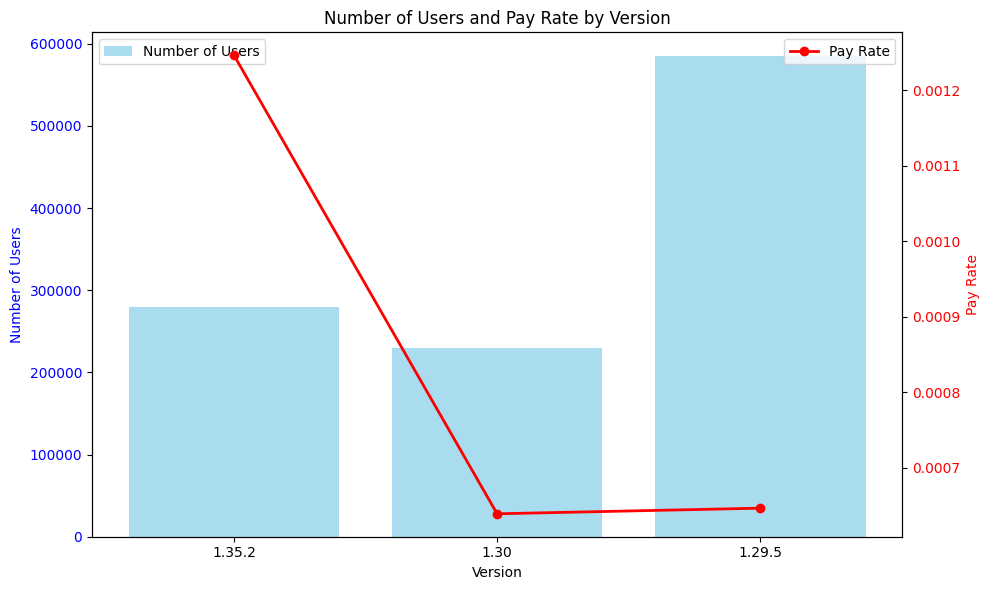

In [ ]:
# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the bar chart for num_user
ax1.bar(pay_rate['version'], pay_rate['num_user'], color='skyblue', alpha=0.7, label='Number of Users')
ax1.set_xlabel('Version')
ax1.set_ylabel('Number of Users', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for pay_rate
ax2 = ax1.twinx()
ax2.plot(pay_rate['version'], pay_rate['pay_rate'], color='red', marker='o', linewidth=2, label='Pay Rate')
ax2.set_ylabel('Pay Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding a title
plt.title('Number of Users and Pay Rate by Version')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

User ở version 1.35.2 có tỷ lệ chi trả cao hơn, vượt trội hẳn so với 2 version còn lại

#### ltv per appversion

In [ ]:
query = """
WITH cohort AS (
  SELECT
    user_pseudo_id AS user_id,
    date_par AS cohort_date
  FROM `royal-hexa-in-house.pixon_data_science.002_mock`
  WHERE event_name = 'first_open' and version IN ('1.29.5')
  and date_par >= '2024-06-15'
),

sessions AS (
  SELECT
    user_pseudo_id AS user_id,
    date_par AS session_date
  FROM `royal-hexa-in-house.pixon_data_science.002_mock`
  WHERE event_name = 'session_start' and version IN ('1.29.5')
  and date_par >= '2024-06-15'
),

revenue AS (
SELECT
  hihi.revenue_date,
  hihi.user_id,
  IFNULL(hihi.rev_ads, 0) + IFNULL(hihi.rev_iap, 0) as revenue
FROM (
  SELECT
    date_par as revenue_date,
    user_pseudo_id as user_id,
    SUM(IFNULL(event_value_in_usd, 0)) as rev_iap,
    SUM(IFNULL((SELECT value.double_value FROM UNNEST(event_params) WHERE KEY = 'value'), 0)) AS rev_ads
  FROM `royal-hexa-in-house.pixon_data_science.002_mock`
  WHERE event_name in('in_app_purchase','ad_impression') and version IN ('1.29.5') and date_par >= '2024-06-15'
  GROUP BY 1,2
) as hihi
),

cohort_revenue AS (
  SELECT
    c.user_id,
    c.cohort_date,
    r.revenue_date,
    DATE_DIFF(r.revenue_date, c.cohort_date, DAY) AS day_number,
    IFNULL(r.revenue, 0) AS revenue
  FROM cohort c
  LEFT JOIN revenue r
    ON c.user_id = r.user_id
    AND r.revenue_date >= c.cohort_date
)

SELECT
  c.cohort_date,
  COUNT(DISTINCT c.user_id) AS total_users,
  COALESCE(SUM(CASE WHEN cr.day_number = 0 THEN cr.revenue END), 0) / COUNT(DISTINCT c.user_id) AS Day_0_ARPU,
  COALESCE(SUM(CASE WHEN cr.day_number <= 1 THEN cr.revenue END), 0) / COUNT(DISTINCT c.user_id) AS LTV_Day_1,
  COALESCE(SUM(CASE WHEN cr.day_number <= 7 THEN cr.revenue END), 0) / COUNT(DISTINCT c.user_id) AS LTV_Day_7,
  COALESCE(SUM(cr.revenue), 0) / COUNT(DISTINCT c.user_id) AS LTV_Total
FROM cohort c
LEFT JOIN cohort_revenue cr
  ON c.user_id = cr.user_id
GROUP BY 1
ORDER BY 1;
"""

query1 = """
WITH cohort AS (
  SELECT
    user_pseudo_id AS user_id,
    date_par AS cohort_date
  FROM `royal-hexa-in-house.pixon_data_science.002_mock`
  WHERE event_name = 'first_open' and version IN ('1.30')
  and date_par >= '2024-06-15'
),

sessions AS (
  SELECT
    user_pseudo_id AS user_id,
    date_par AS session_date
  FROM `royal-hexa-in-house.pixon_data_science.002_mock`
  WHERE event_name = 'session_start' and version IN ('1.30')
  and date_par >= '2024-06-15'
),

revenue AS (
SELECT
  hihi.revenue_date,
  hihi.user_id,
  IFNULL(hihi.rev_ads, 0) + IFNULL(hihi.rev_iap, 0) as revenue
FROM (
  SELECT
    date_par as revenue_date,
    user_pseudo_id as user_id,
    SUM(IFNULL(event_value_in_usd, 0)) as rev_iap,
    SUM(IFNULL((SELECT value.double_value FROM UNNEST(event_params) WHERE KEY = 'value'), 0)) AS rev_ads
  FROM `royal-hexa-in-house.pixon_data_science.002_mock`
  WHERE event_name in('in_app_purchase','ad_impression') and version IN ('1.30') and date_par >= '2024-06-15'
  GROUP BY 1,2
) as hihi
),

cohort_revenue AS (
  SELECT
    c.user_id,
    c.cohort_date,
    r.revenue_date,
    DATE_DIFF(r.revenue_date, c.cohort_date, DAY) AS day_number,
    IFNULL(r.revenue, 0) AS revenue
  FROM cohort c
  LEFT JOIN revenue r
    ON c.user_id = r.user_id
    AND r.revenue_date >= c.cohort_date
)

SELECT
  c.cohort_date,
  COUNT(DISTINCT c.user_id) AS total_users,
  COALESCE(SUM(CASE WHEN cr.day_number = 0 THEN cr.revenue END), 0) / COUNT(DISTINCT c.user_id) AS Day_0_ARPU,
  COALESCE(SUM(CASE WHEN cr.day_number <= 1 THEN cr.revenue END), 0) / COUNT(DISTINCT c.user_id) AS LTV_Day_1,
  COALESCE(SUM(CASE WHEN cr.day_number <= 7 THEN cr.revenue END), 0) / COUNT(DISTINCT c.user_id) AS LTV_Day_7,
  COALESCE(SUM(cr.revenue), 0) / COUNT(DISTINCT c.user_id) AS LTV_Total
FROM cohort c
LEFT JOIN cohort_revenue cr
  ON c.user_id = cr.user_id
GROUP BY 1
ORDER BY 1;
"""

query2= """
WITH cohort AS (
  SELECT
    user_pseudo_id AS user_id,
    date_par AS cohort_date
  FROM `royal-hexa-in-house.pixon_data_science.002_mock`
  WHERE event_name = 'first_open' and version IN ('1.35.2')
  and date_par >= '2024-06-15'
),

sessions AS (
  SELECT
    user_pseudo_id AS user_id,
    date_par AS session_date
  FROM `royal-hexa-in-house.pixon_data_science.002_mock`
  WHERE event_name = 'session_start' and version IN ('1.35.2')
  and date_par >= '2024-06-15'
),

revenue AS (
SELECT
  hihi.revenue_date,
  hihi.user_id,
  IFNULL(hihi.rev_ads, 0) + IFNULL(hihi.rev_iap, 0) as revenue
FROM (
  SELECT
    date_par as revenue_date,
    user_pseudo_id as user_id,
    SUM(IFNULL(event_value_in_usd, 0)) as rev_iap,
    SUM(IFNULL((SELECT value.double_value FROM UNNEST(event_params) WHERE KEY = 'value'), 0)) AS rev_ads
  FROM `royal-hexa-in-house.pixon_data_science.002_mock`
  WHERE event_name in('in_app_purchase','ad_impression') and version IN ('1.35.2') and date_par >= '2024-06-15'
  GROUP BY 1,2
) as hihi
),

cohort_revenue AS (
  SELECT
    c.user_id,
    c.cohort_date,
    r.revenue_date,
    DATE_DIFF(r.revenue_date, c.cohort_date, DAY) AS day_number,
    IFNULL(r.revenue, 0) AS revenue
  FROM cohort c
  LEFT JOIN revenue r
    ON c.user_id = r.user_id
    AND r.revenue_date >= c.cohort_date
)

SELECT
  c.cohort_date,
  COUNT(DISTINCT c.user_id) AS total_users,
  COALESCE(SUM(CASE WHEN cr.day_number = 0 THEN cr.revenue END), 0) / COUNT(DISTINCT c.user_id) AS Day_0_ARPU,
  COALESCE(SUM(CASE WHEN cr.day_number <= 1 THEN cr.revenue END), 0) / COUNT(DISTINCT c.user_id) AS LTV_Day_1,
  COALESCE(SUM(CASE WHEN cr.day_number <= 7 THEN cr.revenue END), 0) / COUNT(DISTINCT c.user_id) AS LTV_Day_7,
  COALESCE(SUM(cr.revenue), 0) / COUNT(DISTINCT c.user_id) AS LTV_Total
FROM cohort c
LEFT JOIN cohort_revenue cr
  ON c.user_id = cr.user_id
GROUP BY 1
ORDER BY 1;
"""

# To data frame
ltv_1_30 = client.query(query1).to_dataframe()
ltv_1_35_2 = client.query(query2).to_dataframe()
ltv_1_29_5 = client.query(query).to_dataframe()
# Style the DataFrame
ltv_1_29_5 = ltv_1_29_5.style.background_gradient(cmap='Greens', axis=0)
ltv_1_30 = ltv_1_30.style.background_gradient(cmap='Greens', axis=0)
ltv_1_35_2 = ltv_1_35_2.style.background_gradient(cmap='Greens', axis=0)


In [ ]:
import pandas as pd
from IPython.display import HTML, display
html_str = f"""
<div style="display: flex; justify-content: space-around;">
    <div style="margin: 10px;">
        <h3>LTV 1.30</h3>
        {ltv_1_30.to_html()}
    </div>
    <div style="margin: 10px;">
        <h3>LTV 1.35.2</h3>
        {ltv_1_35_2.to_html()}
    </div>
    <div style="margin: 10px;">
        <h3>LTV 1.29.5</h3>
        {ltv_1_29_5.to_html()}
    </div>
</div>
"""

# Display the HTML structure
display(HTML(html_str))

,cohort_date,total_users,Day_0_ARPU,LTV_Day_1,LTV_Day_7,LTV_Total
0,2024-06-15,2229,0.011248,0.012794,0.016242,0.018456
1,2024-06-16,1824,0.012547,0.015135,0.019171,0.020867
2,2024-06-17,1436,0.011928,0.013399,0.018617,0.022825
3,2024-06-18,1236,0.010347,0.011672,0.014758,0.017285
4,2024-06-19,1039,0.010911,0.014471,0.021283,0.023687
5,2024-06-20,848,0.008279,0.009823,0.011778,0.012656
6,2024-06-21,800,0.007114,0.008065,0.010214,0.010851
7,2024-06-22,869,0.005588,0.006516,0.007803,0.008038
8,2024-06-23,843,0.007625,0.008869,0.014780,0.014780
9,2024-06-24,744,0.006067,0.007460,0.010520,0.010520


**Kết luận**

User đến từ appversion 1.35.2 có ltv cao vượt trội hơn so với 2 appversion còn lại

## Kết luận chung từ các chỉ số

Tổng kết thông tin:

- **DAU**: Trong 1 tháng này, version 1.29.5 đang có đông user nhất, kéo theo là DAU cao nhất, version 1.30 ở những ngày đầu có lượng user cao hơn cả version 1.29.5 tuy nhiên kể từ ngày 11 - ngày mà version 1.35.2 ra đời thì version 1.30 ngày càng ít user dần cho đến ngày 21 bị version 1.35.2 vượt mặt về lượng user hoạt động.
- **Retention**: Version 1.29.5 có tỷ lệ retention tốt vượt trội so với 2 version còn lại (lý giải cho DAU của version này rất đều và cao), theo sau là 1.35.2 (version được bắn lên sau cùng)
- **Engagement/playtime:** Version 1.35.2 có avg play time thấp nhất (trung bình khoảng 7 phút) so với 2 version còn lại (trung bình từ 8,5 -> 9 phút)
- **Độ khó level:** Version 1.35.2 được điều chỉnh dễ hơn ở 1 số level so với 2 app version còn lại, 2 version còn lại độ khó khá giống nhau (chỉ khác biệt ở 13 level đầu, level 1.30 có độ khó nhỉnh hơn so 1 tí so với level 1.29.5)
- **Drop User theo level:** Từ việc 1.29.5 có tỷ lệ retention tốt hơn hẳn nên version 1.29.5 có bộ level giữ chân user tốt hơn hẳn so với 2 version còn lại. Tiếp theo là 1.35.2 có tỷ lệ giữ chân user tốt hơn so với 1.30
- **Revenue:**
  - **ARPU**: 1.35.2  > 1.30 > 1.29.5 (cụ thể: 0,034 > 0,023 > 0,022)
  - **ARPU by days:** của 1.35.2 tốt hơn hẳn so với 2 version còn lại
  - **Revenue từ ads/iap đến từ 1 user:** của 1.35.2 đều tốt hơn hẳn
  - **Pay Rate:** Tỷ lệ chi trả đến từ 1.35.2 vượt trội hơn so với 2 version còn lại
  - **LTV:** ltv đến từ 1.35.2 cũng cao vượt trội so với 2 version còn lại (càng thời gian dài thì ltv lại càng cao hơn, có những ngày ltv của version này còn gấp đôi so với 2 version còn lại)

Kết luận:
- 1.30 phế nhất ko cần quan tâm
- 1.29.5 Giữ chân tốt nhất(vượt trội so 2 version kia)
- 1.35.2 Mang lại doanh thu nhiều nhất (nhiều vượt trội hơn 2 version kia)

Như vậy, để mang lại doanh thu thì 1.35.2 là version tốt nhất, tuy nhiên ta có thể tối ưu hơn nữa bằng cách:
 - Đối với nhóm user thực sự không ad_reward, không iap, chỉ có revenue từ inter/banner, ta nên áp dụng level 1.29.5
 - Đối với nhóm user có thể iap hay ad_reward, đến từ những quốc gia tốt, ta sẽ áp dụng version 1.35.2